# Write Database

In [13]:
import os
import cv2
import lmdb
from random import Random
from matplotlib import pyplot as plt
from psutil import virtual_memory
import click
import time
from glob import glob
import numpy as np
import math

In [1]:
import cv2
import numpy as np

In [4]:
#im = cv2.imread('D:\\workspace\\data\\train_256_places365challenge\\data_256\\a\\art_gallery\\00000001.jpg')
#im2 = cv2.imread('D:\\workspace\\data\\train_256_places365challenge\\data_256\\m\\mountain\\00000001.jpg')
#im3 = cv2.imread('D:\\workspace\\data\\train_256_places365challenge\\data_256\\u\\utility_room\\00000002.jpg')
im = cv2.imread('D:\\workspace\\proj7643\\CampusLoopDataset\\live\\Image001.jpg')
im2 = cv2.imread('D:\\workspace\\proj7643\\CampusLoopDataset\\live\\Image009.jpg')
im3 = cv2.imread('D:\\workspace\\proj7643\\CampusLoopDataset\\live\\Image052.jpg')

im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

hog = cv2.HOGDescriptor((16,32), (16,16), (16,16), (8,8), 8,1)
des = hog.compute(cv2.resize(im, (160,120)))
#des = des/np.linalg.norm(des)
#des_original = hog.compute(im)
des2 = hog.compute(cv2.resize(im2, (160,120)))
des3 = hog.compute(cv2.resize(im3, (160,120)))
#des2 = des2/np.linalg.norm(des2)
#des2_original = hog.compute(im2)

print('des means',np.mean(des))
print('des var',np.var(des))
print('des2 means',np.mean(des2))
print('des2 var',np.var(des2))
print('des3 means',np.mean(des3))
print('des3 var',np.var(des3))
for ii in range(3648):
    print(des[ii],des2[ii],des3[ii])

des means 0.15630908
des var 0.0067349942
des2 means 0.15172592
des2 var 0.008144143
des3 means 0.15570493
des3 var 0.0069241156
[0.21965878] [0.05569705] [0.1120056]
[0.1663691] [0.00759477] [0.17169996]
[0.25507033] [1.9798763e-06] [0.21724637]
[0.1476514] [0.00430948] [0.09857304]
[0.13764344] [0.03309043] [0.12629181]
[0.05897908] [0.1553838] [0.04793985]
[0.09268457] [0.31410104] [0.09307645]
[0.16340776] [0.27704287] [0.1276143]
[0.13839354] [0.12765399] [0.16438933]
[0.26890638] [0.11076371] [0.19944742]
[0.26890638] [0.01250314] [0.19635881]
[0.24278618] [0.01730652] [0.20501474]
[0.11795686] [0.0235093] [0.16163634]
[0.05915117] [0.18506113] [0.04074341]
[0.09543464] [0.31410104] [0.09764173]
[0.13141873] [0.29631782] [0.2301517]
[0.26890638] [0.0670467] [0.18347676]
[0.24492595] [0.01011383] [0.13529874]
[0.24809921] [2.545555e-06] [0.21075583]
[0.12870574] [0.00094879] [0.14935255]
[0.08039514] [0.00128894] [0.1537592]
[0.02267564] [0.09945023] [0.1797414]
[0.07169133] [0.31

[0.28502548] [0.18352732] [0.2517042]
[0.14152262] [0.30101287] [0.2517042]
[0.04446232] [0.30101287] [0.16197239]
[0.02882149] [0.23430528] [0.11930783]
[0.09374696] [0.09154555] [0.14753261]
[0.16264534] [0.02390002] [0.11847105]
[0.19353576] [0.01632075] [0.06220973]
[0.28502548] [0.0328538] [0.2517042]
[0.28502548] [0.20450206] [0.2517042]
[0.24848194] [0.30101287] [0.14806888]
[0.07857512] [0.30101287] [0.14064805]
[0.03748059] [0.13833834] [0.2517042]
[0.07736219] [0.06867777] [0.2517042]
[0.11807986] [0.01870326] [0.09315684]
[0.10723391] [0.00956423] [0.06116608]
[0.28502548] [0.00361881] [0.2517042]
[0.28377292] [0.30350477] [0.14448814]
[0.07887574] [0.12451407] [0.16841248]
[0.07996078] [0.02975363] [0.15621255]
[0.12295914] [0.01718269] [0.15210663]
[0.12026409] [0.09066335] [0.13159877]
[0.19562675] [0.15539287] [0.16294344]
[0.16687006] [0.13548324] [0.20716941]
[0.27625078] [0.16646047] [0.18346213]
[0.21804899] [0.27216512] [0.18574439]
[0.0583779] [0.25124303] [0.16425

[0.16665359] [0.] [0.00160223]
[0.20251223] [0.] [0.07242879]
[0.21087006] [0.00021178] [0.3406975]
[0.21045345] [0.0079329] [0.3406975]
[0.19133253] [0.02870651] [0.07655489]
[0.17251635] [0.21569413] [0.00692146]
[0.12737061] [0.2105136] [0.]
[0.21087006] [0.02962277] [0.]
[0.18578826] [0.01243261] [0.]
[0.18271594] [0.00673268] [0.06167281]
[0.12883388] [0.0009177] [0.3406975]
[0.11990331] [0.03647364] [0.3406975]
[0.19365881] [0.27066872] [0.10421723]
[0.1633339] [0.4788812] [0.]
[0.21087006] [0.4788812] [0.]
[0.1794777] [0.02597375] [0.]
[0.11832401] [0.00028227] [0.00260335]
[0.21087006] [0.] [0.08525223]
[0.21087006] [0.] [0.3406975]
[0.1792627] [0.00105518] [0.3406975]
[0.12744947] [0.02358469] [0.09513421]
[0.17157516] [0.1145141] [0.00420499]
[0.14227454] [0.12475451] [0.]
[0.16239367] [0.01797777] [0.]
[0.1619681] [0.00260399] [0.00739408]
[0.21087006] [0.00155369] [0.12117279]
[0.15122922] [0.] [0.3406975]
[0.15632804] [0.00815492] [0.3406975]
[0.12757777] [0.05433742] [0.1

[0.08165953] [0.2988293] [0.]
[0.21648942] [0.27790147] [0.07247939]
[0.21900578] [0.02044182] [0.21572205]
[0.21900578] [0.01165099] [0.31779477]
[0.21900578] [0.016384] [0.31779477]
[0.19543856] [0.09525573] [0.12876919]
[0.2040343] [0.20006822] [0.06730929]
[0.15332231] [0.2988293] [0.]
[0.20095837] [0.2988293] [0.]
[0.21900578] [0.16904391] [0.07223985]
[0.16442901] [0.00857448] [0.0108533]
[0.2271945] [0.00162578] [0.17350928]
[0.2271945] [0.00101917] [0.33798137]
[0.2271945] [0.01832631] [0.16935498]
[0.2090336] [0.1414883] [0.06048869]
[0.09991274] [0.26024258] [0.]
[0.08051333] [0.09078092] [0.]
[0.10226094] [0.0247127] [0.00143567]
[0.18786712] [0.16514724] [0.00583213]
[0.2271945] [0.07210857] [0.15451844]
[0.2271945] [0.02467458] [0.33798137]
[0.2271945] [0.09512415] [0.33798137]
[0.17080106] [0.23466699] [0.06932219]
[0.06220819] [0.2583448] [0.00101602]
[0.04625502] [0.07799963] [0.]
[0.06828024] [0.0980493] [0.00342628]
[0.22526854] [0.05754909] [0.01399644]
[0.2271945] [

[0.06225467] [0.09007218] [0.15882722]
[0.0401496] [0.02371425] [0.11645208]
[0.03963147] [0.00246914] [0.18857479]
[0.08291067] [0.00047493] [0.21614002]
[0.08896572] [0.05623841] [0.0903504]
[0.31114244] [0.13740708] [0.15668626]
[0.31114244] [0.26483673] [0.15139289]
[0.07131555] [0.26483673] [0.19925806]
[0.05341759] [0.24766351] [0.22587796]
[0.05244441] [0.0871297] [0.1965912]
[0.05373687] [0.03262771] [0.21174957]
[0.06737337] [0.00619897] [0.15976962]
[0.14243579] [0.06743871] [0.1400284]
[0.31114244] [0.26483673] [0.09668964]
[0.31114244] [0.26483673] [0.08208352]
[0.15774816] [0.26483673] [0.14625089]
[0.05181441] [0.24804682] [0.2069057]
[0.0509057] [0.09551242] [0.19632101]
[0.07642005] [0.02841102] [0.15567438]
[0.07508318] [0.01499003] [0.11318044]
[0.15135811] [0.02847164] [0.16380133]
[0.31114244] [0.15518177] [0.1901189]
[0.31114244] [0.26483673] [0.1660845]
[0.05540704] [0.26483673] [0.22587796]
[0.06008514] [0.2375768] [0.22587796]
[0.03274703] [0.06083153] [0.186893

[0.13369931] [0.29616967] [0.21179107]
[0.08303934] [0.00942397] [0.0065083]
[0.25969654] [0.] [0.09870856]
[0.25969654] [0.] [0.33195794]
[0.11007234] [0.] [0.33195794]
[0.06686179] [0.03435099] [0.09854344]
[0.09445637] [0.32723066] [0.01457318]
[0.06203467] [0.32723066] [0.]
[0.04573455] [0.16515706] [0.]
[0.1618278] [0.00112902] [0.00884664]
[0.25969654] [0.] [0.10216441]
[0.25969654] [0.] [0.33195794]
[0.17438158] [0.00251187] [0.33195794]
[0.10966579] [0.05491059] [0.09996857]
[0.18106288] [0.32723066] [0.032061]
[0.10527765] [0.32723066] [0.]
[0.14105675] [0.19934338] [0.]
[0.15481143] [0.01780626] [0.00793585]
[0.25079775] [0.] [0.15329683]
[0.2191935] [0.] [0.33195794]
[0.22940312] [0.00087336] [0.33195794]
[0.2259767] [0.05901276] [0.10732109]
[0.19306347] [0.32723066] [0.00885364]
[0.08644953] [0.32723066] [0.]
[0.13465755] [0.17629144] [0.]
[0.14314653] [0.00475109] [0.00848483]
[0.1885277] [0.] [0.13566437]
[0.20342846] [0.] [0.33195794]
[0.1663242] [0.00566883] [0.3319579

[0.2146195] [0.2637048] [0.02984053]
[0.14932512] [0.08670673] [0.02623088]
[0.20038898] [0.00686977] [0.13133158]
[0.1971502] [0.00946999] [0.33005103]
[0.22445846] [0.11425154] [0.33005103]
[0.11590365] [0.14645065] [0.10729526]
[0.10786676] [0.18261537] [0.0056386]
[0.06378116] [0.1089295] [0.02110158]
[0.07402977] [0.19540566] [0.01525193]
[0.18077865] [0.2637048] [0.05657202]
[0.22445846] [0.2637048] [0.12887107]
[0.15714209] [0.15668133] [0.33005103]
[0.22160485] [0.2637048] [0.33005103]
[0.0845154] [0.2547486] [0.14689477]
[0.2217057] [0.2637048] [0.01611042]
[0.11944918] [0.23767279] [0.03600644]
[0.14853144] [0.2637048] [0.04976485]
[0.17891814] [0.00171128] [0.07950546]
[0.2025621] [0.00096344] [0.30421457]
[0.22495061] [0.0009618] [0.30421457]
[0.17166156] [0.02067229] [0.18113974]
[0.12106271] [0.08876416] [0.07380617]
[0.07673128] [0.31473002] [0.]
[0.09055632] [0.31473002] [0.]
[0.1368718] [0.06904349] [0.02578202]
[0.18052715] [0.] [0.05776209]
[0.23041907] [0.] [0.30421

[0.0270051] [0.07644976] [0.12994273]
[0.04899405] [0.21360782] [0.21217552]
[0.21869083] [0.2503684] [0.14002508]
[0.2884294] [0.2503684] [0.18260476]
[0.2884294] [0.2503684] [0.17006184]
[0.15351449] [0.24865907] [0.21908183]
[0.10466893] [0.12758987] [0.19522332]
[0.06436576] [0.0601588] [0.21668838]
[0.05497328] [0.03695785] [0.21908183]
[0.06437881] [0.13453117] [0.09140805]
[0.20613931] [0.22891082] [0.08412205]
[0.2884294] [0.23770525] [0.14052661]
[0.2884294] [0.20727964] [0.21908183]
[0.12437146] [0.14843771] [0.17634815]
[0.04391465] [0.11962478] [0.14011584]
[0.03809695] [0.04559413] [0.13544518]
[0.03613777] [0.01202634] [0.09585586]
[0.07024077] [0.07715169] [0.1995069]
[0.21500069] [0.18978111] [0.08869547]
[0.2884294] [0.2503684] [0.08361044]
[0.2884294] [0.2503684] [0.18479311]
[0.1283029] [0.16525777] [0.1434891]
[0.08467776] [0.10966574] [0.16367279]
[0.03133921] [0.03546347] [0.21051942]
[0.03805963] [0.01004279] [0.21908183]
[0.22141951] [0.02670347] [0.20291628]
[0

[0.2518856] [0.07659176] [0.26266906]
[0.2518856] [0.12202659] [0.26266906]
[0.2475543] [0.06530722] [0.14738545]
[0.04326772] [0.08706764] [0.26266906]
[0.01595245] [0.30151412] [0.26266906]
[0.2518856] [0.30151412] [0.02639334]
[0.12834422] [0.05937741] [0.04443897]
[0.07025791] [0.0688009] [0.13561226]
[0.14747533] [0.06935341] [0.11916009]
[0.23139094] [0.07236589] [0.06127268]
[0.16135465] [0.30151412] [0.03710651]
[0.13612142] [0.30151412] [0.04916659]
[0.2032983] [0.30151412] [0.03073377]
[0.18599804] [0.30151412] [0.26266906]
[0.10943196] [0.07662412] [0.2042783]
[0.0823049] [0.03410558] [0.17117019]
[0.23301649] [0.0253635] [0.16841793]
[0.2518856] [0.02030882] [0.19697721]
[0.2518856] [0.03565454] [0.21889888]
[0.21340537] [0.09038045] [0.20114368]
[0.15146758] [0.30151412] [0.26266906]
[0.15011804] [0.26053235] [0.09606031]
[0.11406856] [0.09016971] [0.12538914]
[0.09330364] [0.10286624] [0.12780987]
[0.12033277] [0.06958232] [0.1522497]
[0.0848175] [0.21726008] [0.19830163]

[0.23661797] [0.10390373] [0.03928319]
[0.23661797] [0.09470533] [0.00554937]
[0.22834629] [0.01632061] [0.07777791]
[0.18045023] [0.09502815] [0.27244824]
[0.0667367] [0.02431521] [0.27244824]
[0.09762216] [0.10198986] [0.27244824]
[0.14176324] [0.22864562] [0.25607088]
[0.14118044] [0.20165455] [0.1547417]
[0.23661797] [0.3004234] [0.07728862]
[0.23661797] [0.3004234] [0.05754292]
[0.23661797] [0.11927122] [0.27244824]
[0.23661797] [0.06897792] [0.02086202]
[0.09013309] [0.02812956] [0.07620929]
[0.07456749] [0.24078375] [0.11293567]
[0.06380522] [0.3004234] [0.23211512]
[0.12110725] [0.3004234] [0.13945116]
[0.23661797] [0.03708198] [0.04317955]
[0.23661797] [0.02494064] [0.02477368]
[0.23661797] [0.03011883] [0.02766287]
[0.23661797] [0.17209566] [0.16702947]
[0.0664634] [0.05026981] [0.27244824]
[0.05787263] [0.10490155] [0.27244824]
[0.08194347] [0.17370436] [0.27244824]
[0.13077569] [0.14271957] [0.27244824]
[0.22798534] [0.1354923] [0.24204135]
[0.21781929] [0.18998143] [0.2072

[0.1432212] [0.13633212] [0.2100373]
[0.27158287] [0.10905676] [0.17650793]
[0.27158287] [0.15453075] [0.1779133]
[0.11124883] [0.08995825] [0.18466687]
[0.2411251] [0.07724953] [0.16229454]
[0.13005145] [0.28637016] [0.2100373]
[0.09051562] [0.28637016] [0.18253312]
[0.08798692] [0.11091796] [0.2100373]
[0.14383705] [0.07659695] [0.17641124]
[0.27158287] [0.07054168] [0.20203522]
[0.27158287] [0.14577286] [0.13490702]
[0.10984692] [0.06495245] [0.14740697]
[0.09229361] [0.14717484] [0.13275053]
[0.02572569] [0.28637016] [0.16388053]
[0.09249263] [0.28637016] [0.1370856]
[0.15762207] [0.14575016] [0.13861656]
[0.27158287] [0.13557974] [0.12147285]
[0.27158287] [0.08138546] [0.20768055]
[0.27158287] [0.15796503] [0.16919214]
[0.11626199] [0.10016933] [0.10104464]
[0.25885668] [0.13538325] [0.0831528]
[0.11465713] [0.28637016] [0.17178547]


In [14]:
def writeFileList(dirNameArr):
    """
    Returns the python list object of the files under a directory name for processing later
    """
    '''
    if isinstance(dirNameArr, basestring): # someone only inputed a single string, so make it a list so that this code works

        dirNameArr = [dirNameArr]
    '''
    dirNameArr = [dirNameArr]
    files_list = [] # list of all files with full path
    for dirName in dirNameArr: 
    # loop through all files in the list of directory names inputted. This is useful for multiple datasets	
        with click.progressbar(os.walk(dirName), label="Parsing files in "+dirName) as bar:
            for dirname, dirnames, filenames in bar:
                for filename in filenames:
                    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg') or filename.endswith('.bmp') or filename.endswith('.tiff'):	
                        fileName = glob(os.path.join(dirname, filename)) 
                        files_list += fileName
 
    return files_list

In [15]:
def randPerspectiveWarp(im, w, h, r, ret_pts=False):

    """
    Applies a pseudo-random perspective warp to an image. 

    input: 

    im - the original image

    h - image height
    
    w - image width

    r - Random instance

    returns:

    im_warp - the warped image

    ret_pts - if True, return the points generated 
    """ 

    # Generate two pseudo random planes within tolerances for the projective transformation of the original image
    # Each point is from the center half of its respective x y quandrant. openCV getPerpectiveTransform expects [Q2, Q3, Q1, Q4] for points in each image quandrant, so that it 
    # the iteration order here. Note that 0,0 is the top left corner of the picture. Additionally, we can only perform a tranformation to zoom in, since exprapolated pixels
    # look unnatural, and will ruin the similarity between the two images.

    # limits for random number generation
    minsx = [ 0, 3*w/4 ]
    maxsx = [ w/4, w ]
    minsy= [ 0, 3*h/4 ]
    maxsy = [ h/4, h ]


    pts_orig = np.zeros((4, 2), dtype=np.float32) # four original points
    pts_warp = np.zeros((4, 2), dtype=np.float32) # points for the affine transformation. 

    # fixed point for the first plane	
    pts_orig[0, 0] = 0
    pts_orig[0, 1] = 0
    
    pts_orig[1, 0] = 0
    pts_orig[1, 1] = h

    pts_orig[2, 0] = w
    pts_orig[2, 1] = 0

    pts_orig[3, 0] = w
    pts_orig[3, 1] = h

    # random second plane
    pts_warp[0, 0] = r.uniform(minsx[0], maxsx[0])
    pts_warp[0, 1] = r.uniform(minsy[0], maxsy[0])
    
    pts_warp[1, 0] = r.uniform(minsx[0], maxsx[0])
    pts_warp[1, 1] = r.uniform(minsy[1], maxsy[1])

    pts_warp[2, 0] = r.uniform(minsx[1], maxsx[1])
    pts_warp[2, 1] = r.uniform(minsy[0], maxsy[0])

    pts_warp[3, 0] = r.uniform(minsx[1], maxsx[1])
    pts_warp[3, 1] = r.uniform(minsy[1], maxsy[1])

    # compute the 3x3 transform matrix based on the two planes of interest
    T = cv2.getPerspectiveTransform(pts_warp, pts_orig)

    # apply the perspective transormation to the image, causing an automated change in viewpoint for the net's dual input
    im_warp = cv2.warpPerspective(im, T, (w, h))
    if not ret_pts:
        return im_warp
    else: 
        return im_warp, pts_warp


In [16]:
def showImWarpEx(im_fl, save):
    """
    Show an example of warped images and their corresponding four corner points.
    """

    im = cv2.resize(cv2.cvtColor(cv2.imread(im_fl), cv2.COLOR_BGR2GRAY), (256,int(120./160*256)))
    r = Random(0)
    r.seed(time.time())
    h, w = im.shape
    im_warp, pts_warp = randPerspectiveWarp(im, w, h, r, ret_pts=True) # get the perspective warped picture	

    pts_orig = np.zeros((4, 2), dtype=np.float32) # four original points
    ofst = 3
    pts_orig[0, 0] = ofst
    pts_orig[0, 1] = ofst
    pts_orig[1, 0] = ofst
    pts_orig[1, 1] = h-ofst
    pts_orig[2, 0] = w-ofst
    pts_orig[2, 1] = ofst
    pts_orig[3, 0] = w-ofst
    pts_orig[3, 1] = h-ofst

    kpts_warp = []
    kpts_orig = []
    matches = []

    pts_rect = np.zeros((4, 2), dtype=np.float32) # for creating rectangles
    pts_rect[0, 0] = w/4
    pts_rect[0, 1] = h/4
    pts_rect[1, 0] = w/4
    pts_rect[1, 1] = 3*h/4
    pts_rect[2, 0] = 3*w/4
    pts_rect[2, 1] = h/4
    pts_rect[3, 0] = 3*w/4
    pts_rect[3, 1] = 3*h/4
    if save: # save orig before placing rectangles on it
        cv2.imwrite("Original.jpg", im)

    for i in range(4):
        kpts_warp.append(cv2.KeyPoint(pts_warp[i,0], pts_warp[i,1], 0))
        kpts_orig.append(cv2.KeyPoint(pts_orig[i,0], pts_orig[i,1], 0))
        matches.append(cv2.DMatch(i,i,0))
        im = cv2.rectangle(im, (pts_orig[i,0], pts_orig[i,1]), (pts_rect[i,0], pts_rect[i,1]), (255,255,255), thickness=2)	
    draw_params = dict(matchColor=(0,0,250),flags = 4)
    out_im = cv2.drawMatches(im, kpts_warp, im_warp, kpts_orig, matches, None, **draw_params)
    plots = os.path.join(os.getcwd(), "plots")
    from matplotlib import rcParams
    rcParams['savefig.directory'] = plots
    if not os.path.isdir(plots):
        os.makedirs(plots)
    plt.imshow(out_im)
    plt.axis('off')
    plt.show()
    if save:
        cv2.imwrite("Warped.jpg", im_warp)
        print ("Images saved in current directory")

In [17]:
def calcNumBuff(w, h, n, n_comp, mem):
    """ 
    calculate the minimum number of buffers to use based on the capacity of system ram and gpu memory
    """

    # calculate the number of buffers to use based on the data size and the available RAM
    # Additionally, only use about 7/8 of RAM for buffers dues to other overheads (mainly from PCA), and add 1 extra buffer in case the calculated number is zero

    # RAM in bytes
    ram_mem = mem.available

    bytePerFloat = 4
    bytePerInt = 1

    # images are uint8, descriptors are floats
    bytesInRAMFromData = int( n * (n_comp * bytePerFloat + w*h*bytePerInt) )

    min_buff_ram = 1 + int( 3.0 * bytesInRAMFromData / ram_mem / 4.0) # min number of buffers to take up a little less than 75% RAM per buffer, plus one in case it's zero

    # return the max number of buffers out of the two so that we dont overload either RAM or GPU memory. This makes this code portable to other machines, but the results will vary
    return min_buff_ram, bytesInRAMFromData

In [18]:
def decideWaitForMem(initBytesNeeded, percentDone, mem):
    '''
    Return true if need to wait for more memory. Return false otherwise
    '''
    needWaitForMem = False	
    if (1.0 - percentDone) * initBytesNeeded > mem.available: # note that percent done is in [0,1]
        needWaitForMem = True

    return needWaitForMem

In [19]:
from sys import platform
print(platform)

mem = virtual_memory()
print(mem)

win32
svmem(total=16989859840, available=9548079104, percent=43.8, used=7441780736, free=9548079104)


In [20]:
im = cv2.imread('D:\\workspace\\data\\data_256\\b\\balcony\\interior\\00000001.jpg')
im2 = cv2.imread('D:\\workspace\\data\\dataset\\06\\image_0\\000000.png')
im3 = cv2.imread('D:\\workspace\\data\\data_256\\l\\laundromat\\00000002.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

hog = cv2.HOGDescriptor((16,32), (16,16), (16,16), (8,8), 8,1)
des = hog.compute(cv2.resize(im, (160,120)))
#des = des/np.linalg.norm(des)
#des_original = hog.compute(im)
des2 = hog.compute(cv2.resize(im2, (160,120)))
des3 = hog.compute(cv2.resize(im3, (160,120)))
#des2 = des2/np.linalg.norm(des2)
#des2_original = hog.compute(im2)

print('des means',np.mean(des))
print('des var',np.var(des))

'''
print('des_original means',np.mean(des_original))
print('des_original var',np.var(des_original))
'''
print('des2 means',np.mean(des2))
print('des2 var',np.var(des2))
print('des3 means',np.mean(des3))
print('des3 var',np.var(des3))
'''
print('des2_original means',np.mean(des2_original))
print('des2_original var',np.var(des2_original))
'''
#print(np.linalg.norm(des-des2,1))
#print(np.linalg.norm(des,2))
#print(des.shape)
'''
from skimage import feature
H = feature.hog(cv2.resize(im, (160,120)), orientations=8, pixels_per_cell=(16, 32),cells_per_block=(4, 4), transform_sqrt=True, block_norm="L1")
H2 = feature.hog(cv2.resize(im2, (160,120)), orientations=8, pixels_per_cell=(16, 32),cells_per_block=(4, 4), transform_sqrt=True, block_norm="L1")
#print(H.shape)
print(np.mean(H))
print(np.var(H))
print(np.mean(H2))
print(np.var(H2))
'''

des means 0.14031193
des var 0.011468206
des2 means 0.157703
des2 var 0.006298166
des3 means 0.1258038
des3 var 0.0153159425


'\nfrom skimage import feature\nH = feature.hog(cv2.resize(im, (160,120)), orientations=8, pixels_per_cell=(16, 32),cells_per_block=(4, 4), transform_sqrt=True, block_norm="L1")\nH2 = feature.hog(cv2.resize(im2, (160,120)), orientations=8, pixels_per_cell=(16, 32),cells_per_block=(4, 4), transform_sqrt=True, block_norm="L1")\n#print(H.shape)\nprint(np.mean(H))\nprint(np.var(H))\nprint(np.mean(H2))\nprint(np.var(H2))\n'

In [25]:
im = cv2.imread('D:\\workspace\\data\\dataset\\06\\image_0\\000000.png',cv2.IMREAD_UNCHANGED)
print(im.shape)
print(im.nbytes)

(370, 1226)
453620


In [34]:
def writeDatabase(outDBNames, files_list, w, h, data_root="", prev_model_basename="", test_db=False, debugFlag=False):

    """
    Creates two tensors of image matrices. The images are read from the filenames in files_list, resized, converted to grayscale if they are color.
    The images are shuffled to avoid statistical issues with caffe, then randomly swapped.
    X1 contains just images from each pair, and X2 contains HOG descriptors from the other image of each pair 
    The end product is created in buffers and written to two LMDBs for X1 and X2 accordingly
    """

    if (not data_root=="") and (not data_root.endswith('\\')): # expect directory name to have '/' appended
        #print(data_root)
        data_root += '\\'
    #print(data_root)
    #if not 'linux' in platform:
    #    raise Exception('Error: only UNIX machines are currently supported')

    print ('\npreparing to transform images and write databases ...\n') 

    n = len(files_list) # number of samples

    n_comp = 3648 # HOG vector length

    mem = virtual_memory()
    num_buff, bytesNeeded = calcNumBuff(w, h, n, n_comp, mem) # number of buffers for database writing
    if debugFlag:
        num_buff = 3
        bytesNeeded = 0
                
    n_per_buff = int(math.ceil(n/num_buff)) 
    print ("Number of buffers: ", num_buff, ", Images per buffer: ", n_per_buff, ", Total image count: " + str(n) + '\n\n\n\n\n\n\n')
    data_size_per_img = cv2.imread(files_list[0],cv2.IMREAD_UNCHANGED).nbytes
    r = Random(0) # make a random number generator instance seeded with 0	
    if test_db:
        plt.ion()
    inds = list(range(n))
    # shuffling indices will slow down the array accessing process,
    # but will take away any relationship between adjacent images, making the model better
    r.shuffle(inds) # note that shuffle works in place
    if not os.path.isdir(data_root+"train_data"):
        os.makedirs(data_root+"train_data")
    # prepare the max database size. There is no harm in making it too big, since this is only the cap, not the actual size. If disk space runs out, it will throw an error and crash anyways
    #map_size = 20*1024**3 # 20GB
    #print(data_size_per_img)
    map_size1 = data_size_per_img*n
    print(map_size1)
    map_size2 = 4*n_comp*n
    #print(n)
    #print(map_size)
    chan = 1
    first_buff_flag = True
    im_count_tot = 0 # total number of pictures
    i_to_show = r.randint(0,n_per_buff-1)
    hog = cv2.HOGDescriptor((16, 32), (16,16), (16,16), (8,8), 2,1)	
    X1_db_name = data_root + "train_data\\" + outDBNames[0]
    X2_db_name = data_root + "train_data\\" + outDBNames[1]
    #print(X1_db_name)

    with click.progressbar(range(num_buff), label="Total Progress") as bigBar:
        for j in bigBar:
            ##### Database writing #################################
            db1 = lmdb.open(X1_db_name, map_size=map_size1)
            db2 = lmdb.open(X2_db_name, map_size=map_size2)
            #db1 = lmdb.open('live', map_size=map_size)
            #db2 = lmdb.open('memory', map_size=map_size)
            k = 0 # index in X row
            txn1 = db1.begin(write=True, buffers=True) # start a new transaction for the database
            txn2 = db2.begin(write=True, buffers=True)
            with click.progressbar(inds[(j*n_per_buff):((j+1)*n_per_buff)], label=("Progress in buffer "+str(j+1)+" out of " + str(num_buff))) as bar:
                resolutions = []
                for i in bar: # index in files_list, which is n long
                    im_file = files_list[i]
                    im = cv2.imread(im_file)
                    while im is None: # Some images get corrupted sometimes. Check for this so that it doesnt crash a multi-day running process (sigh)
                        print ("\n\n\nSkipping corrupted image:",im_file, ". Bootstrapping random image from dataset\n\n\n")
                        im_file = files_list[r.randint(0, n-1)]
                        im = cv2.imread(im_file)

                    if len(im.shape) > 2: # if color image, convert to grayscale
                        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 

                    im = cv2.resize(im, (w, h), interpolation = cv2.INTER_CUBIC)
                    im_warp = randPerspectiveWarp(im, w, h, r) # get the perspective warped picture	
                    r.seed(i) # adds extra randomness, but is still reproduceable with the same dataset
                    # image processing function. Needs random number generator
                    #im, im_warp = preprocess(im, im_warp, r)				
                    if test_db and i==i_to_show: # only show the last image. If we show all of them, computation is VERY slow
                        plt.subplot(121),plt.imshow(im, cmap='gray'),plt.title('Original, Brightness')
                        plt.subplot(122),plt.imshow(im_warp, cmap='gray'),plt.title('Perspective Changed')
                        plt.pause(10) # only show it for 10 seconds incase the user walks away.
                        plt.close()	
                        
                    # randomly choose whether the original or the transformed image go in X1/X2 respectively. This prevents bias in the model since we can only zoom in
                    switchFlag = r.randint(0,1)
                    if switchFlag:
                        im1 = im_warp
                        des = hog.compute(cv2.resize(im, (160,120)))
                        #print(des)
                    else:
                        im1 = im
                        des = hog.compute(cv2.resize(im_warp, (160,120)))
                        #print(des)
                    #print('means',np.mean(des))
                    #print('var',np.var(des))

                    str_id = '{:08}'.format(im_count_tot).encode('ascii')
                    #a = '{:08}'.format(im_count_tot)
                    #print(a)
                    #print(a.dtype)
                    # we only need one str_id as well, since they should be the same for corresponding images

                    '''
                    datum1 = caffe.proto.caffe_pb2.Datum()
                    datum1.channels = chan#1
                    datum1.width = w
                    datum1.height = h
                    datum1.data = im1.tobytes() 
                    txn1.put(str_id, datum1.SerializeToString()) # add it to database1
                    
                    datum2 = caffe.proto.caffe_pb2.Datum()
                    datum2.channels = 1
                    datum2.width = 1
                    datum2.height = n_comp
                    datum2.data = np.reshape(des, (n_comp)).tobytes() 
                    txn2.put(str_id, datum2.SerializeToString()) # add it to database2
                    '''
                    txn1.put(str_id,im1)
                    txn2.put(str_id,des)
                    #print(str_id.dtype)
                    #print(im1.dtype)
                    #print(des.dtype)
                    #print(des.shape)
                    
                    k += 1
                    #print(i)
                    
                    #print(im_count_tot)
                    #print('***')
                    im_count_tot += 1
                    
                    if im_count_tot == n:
                        break
                # end for i in inds[(j*n_per_buff):((j+1)*n_per_buff)]:
            txn1.commit()
            txn2.commit()
    return im_count_tot
        # end for j in range(num_buff)

In [35]:
"""
Launch the database writing with the widht and height desired in the database,
the list of directory names for the dataset(s), and the names of the output directories
for X1 and X2, respectively 
"""
w=160
h=120
#dirName = 'D:\\workspace\\data\\dataset\\train' #The space-separated names with full paths of the directory (directories) containing your dataset(s). 
#dirName = 'D:\\workspace\\proj7643\\CampusLoopDataset\\live'
dirName = 'D:\\workspace\\data\\train_256_places365standard'
outDBNames = ['imgs','descriptors'] #[dirName1 dirName2]
dataRoot = 'D:\\workspace\\proj7643\\train' #Where you want the train_data directory to be placed
testDB = False #Unit test flag
debugFlag = False #debugFlag

t0 = time.time()

files_list = writeFileList(dirName) # recursively  glob the file names.

total_number = writeDatabase(outDBNames, files_list, w, h, data_root=dataRoot, test_db=testDB, debugFlag=debugFlag) # write the two databases

print ('\n\ndone')
t1 = time.time()
print ('\n\nDatabase writing: ', (t1-t0) , ' seconds')


preparing to transform images and write databases ...

Number of buffers:  13 , Images per buffer:  138728 , Total image count: 1803460







354574663680


KeyboardInterrupt: 

In [10]:
print(total_number)

100


In [ ]:
def writeFileList(dirNameArr):
    """
    Returns the python list object of the files under a directory name for processing later
    """
    '''
    if isinstance(dirNameArr, basestring): # someone only inputed a single string, so make it a list so that this code works

        dirNameArr = [dirNameArr]
    '''
    dirNameArr = [dirNameArr]
    files_list = [] # list of all files with full path
    for dirName in dirNameArr: 
    # loop through all files in the list of directory names inputted. This is useful for multiple datasets	
        with click.progressbar(os.walk(dirName), label="Parsing files in "+dirName) as bar:
            for dirname, dirnames, filenames in bar:
                for filename in filenames:
                    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg') or filename.endswith('.bmp') or filename.endswith('.tiff'):	
                        fileName = glob(os.path.join(dirname, filename)) 
                        files_list += fileName
 
    return files_list,len(files_list)

In [ ]:
def randPerspectiveWarp(im, w, h, r):

    """
    Applies a pseudo-random perspective warp to an image. 

    input: 

    im - the original image

    h - image height
    
    w - image width

    r - Random instance

    returns:

    im_warp - the warped image

    """ 

    # Generate two pseudo random planes within tolerances for the projective transformation of the original image
    # Each point is from the center half of its respective x y quandrant. openCV getPerpectiveTransform expects [Q2, Q3, Q1, Q4] for points in each image quandrant, so that it 
    # the iteration order here. Note that 0,0 is the top left corner of the picture. Additionally, we can only perform a tranformation to zoom in, since exprapolated pixels
    # look unnatural, and will ruin the similarity between the two images.

    # limits for random number generation
    minsx = [ 0, 3*w/4 ]
    maxsx = [ w/4, w ]
    minsy= [ 0, 3*h/4 ]
    maxsy = [ h/4, h ]


    pts_orig = np.zeros((4, 2), dtype=np.float32) # four original points
    pts_warp = np.zeros((4, 2), dtype=np.float32) # points for the affine transformation. 

    # fixed point for the first plane	
    pts_orig[0, 0] = 0
    pts_orig[0, 1] = 0
    
    pts_orig[1, 0] = 0
    pts_orig[1, 1] = h

    pts_orig[2, 0] = w
    pts_orig[2, 1] = 0

    pts_orig[3, 0] = w
    pts_orig[3, 1] = h

    # random second plane
    pts_warp[0, 0] = r.uniform(minsx[0], maxsx[0])
    pts_warp[0, 1] = r.uniform(minsy[0], maxsy[0])
    
    pts_warp[1, 0] = r.uniform(minsx[0], maxsx[0])
    pts_warp[1, 1] = r.uniform(minsy[1], maxsy[1])

    pts_warp[2, 0] = r.uniform(minsx[1], maxsx[1])
    pts_warp[2, 1] = r.uniform(minsy[0], maxsy[0])

    pts_warp[3, 0] = r.uniform(minsx[1], maxsx[1])
    pts_warp[3, 1] = r.uniform(minsy[1], maxsy[1])

    # compute the 3x3 transform matrix based on the two planes of interest
    T = cv2.getPerspectiveTransform(pts_warp, pts_orig)

    # apply the perspective transormation to the image, causing an automated change in viewpoint for the net's dual input
    im_warp = cv2.warpPerspective(im, T, (w, h))
    return im_warp

# Model and Train

In [2]:
import torch
import pickle
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.optim as optim
from PIL import Image

In [3]:
from Model import Model

In [ ]:
t0 = time.time()
files_list,total_number = writeFileList(dirName)
t1 = time.time()
print ('\n\nLoading Paths: ', (t1-t0) , ' seconds')

In [ ]:
device  = torch.device("cuda:0")

model = Model().to(device)
PATH = 'model\\model.pth'
#model.load_state_dict(torch.load(PATH))
#criterion = nn.MSELoss(reduction = 'sum')

In [29]:
criterion = nn.L1Loss(reduction = 'sum')
optimizer = optim.Adam(model.parameters(), lr=1e-5,weight_decay=0.995)

class TrainingSet(Dataset):
    def __init__(self,imgPath,desPath,total_number,h=120,w=160):
        self.h = h
        self.w = w
        self.length = total_number
        self.img_env = lmdb.open(imgPath, readonly=True, lock=False, readahead=False,
                                meminit=False)
        self.desp_env = lmdb.open(desPath, readonly=True, lock=False, readahead=False,
                                meminit=False)
        
    def __len__(self):
        return self.length
    
    def __getitem__(self,index):
        key = '{:08}'.format(index).encode('ascii')
        #print(key)
        with self.img_env.begin(write=False) as txn1:
            imgbuf = txn1.get(key)
        img = np.frombuffer(imgbuf,dtype=np.uint8).reshape(1,self.h,self.w)
        with self.desp_env.begin(write=False) as txn2:
            despbuf = txn2.get(key)
        desp = np.frombuffer(despbuf,dtype=np.float32).reshape(3648,)# change this if you changed the size of the descriptor
        return img,desp

In [ ]:
class TrainingSet(Dataset):
    def __init__(self,path,total_number,h=120,w=160):
        self.h = h
        self.w = w
        self.length = total_number
        self.hog = cv2.HOGDescriptor((16, 32), (16,16), (16,16), (8,8), 2,1)
        self.imgs = path
        
    def __len__(self):
        return self.length
        
    def loader(path,h,w):
        img =  cv2.imread(path,0)
        img = cv2.resize(img,(h,w))
        img_tensor = torch.from_numpy(img).to(device)
        return img_tensor
    
    def __getitem__(self,index):
        
        return img,desp

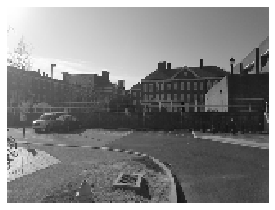

tensor(0.3510, device='cuda:0')
[Epoch 1] loss: 68.666 time used: 0.223


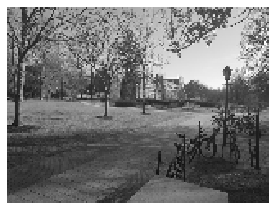

tensor(0.3510, device='cuda:0')
[Epoch 2] loss: 68.666 time used: 0.124


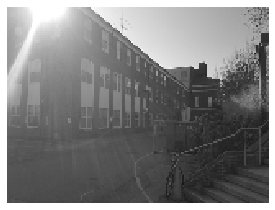

tensor(0.3510, device='cuda:0')
[Epoch 3] loss: 68.666 time used: 0.119


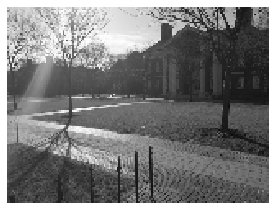

tensor(0.3510, device='cuda:0')
[Epoch 4] loss: 68.666 time used: 0.123


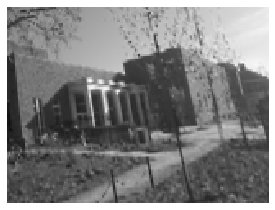

tensor(0.3510, device='cuda:0')
[Epoch 5] loss: 68.666 time used: 0.112


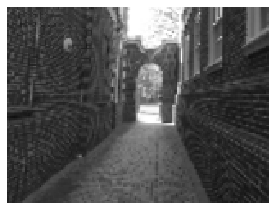

tensor(0.3510, device='cuda:0')
[Epoch 6] loss: 68.666 time used: 0.119


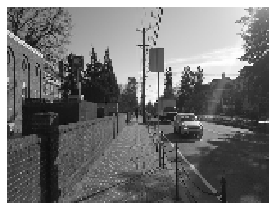

tensor(0.3510, device='cuda:0')
[Epoch 7] loss: 68.666 time used: 0.164


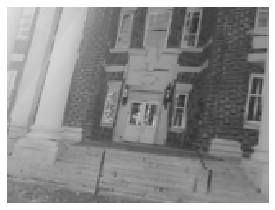

tensor(0.3510, device='cuda:0')
[Epoch 8] loss: 68.666 time used: 0.116


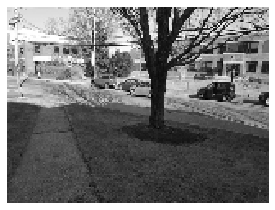

tensor(0.3510, device='cuda:0')
[Epoch 9] loss: 68.666 time used: 0.109


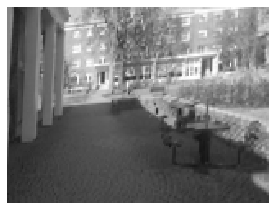

tensor(0.3510, device='cuda:0')
[Epoch 10] loss: 68.666 time used: 0.132


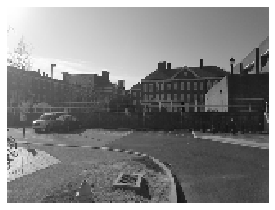

tensor(0.3510, device='cuda:0')
[Epoch 11] loss: 68.666 time used: 0.111


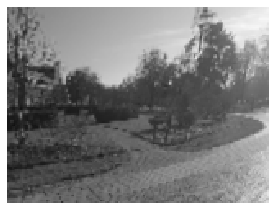

tensor(0.3510, device='cuda:0')
[Epoch 12] loss: 68.666 time used: 0.109


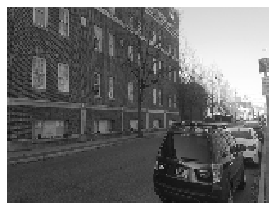

tensor(0.3510, device='cuda:0')
[Epoch 13] loss: 68.666 time used: 0.109


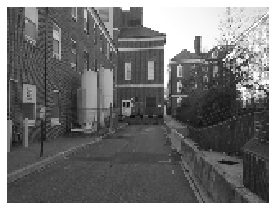

tensor(0.3510, device='cuda:0')
[Epoch 14] loss: 68.666 time used: 0.119


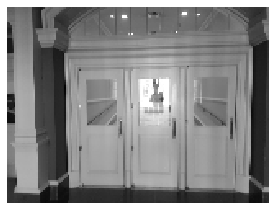

tensor(0.3510, device='cuda:0')
[Epoch 15] loss: 68.666 time used: 0.119


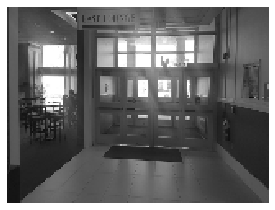

tensor(0.3510, device='cuda:0')
[Epoch 16] loss: 68.666 time used: 0.112


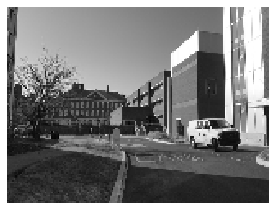

tensor(0.3510, device='cuda:0')
[Epoch 17] loss: 68.666 time used: 0.109


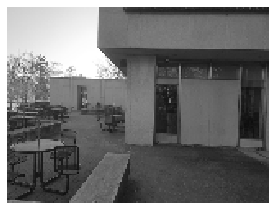

tensor(0.3510, device='cuda:0')
[Epoch 18] loss: 68.666 time used: 0.113


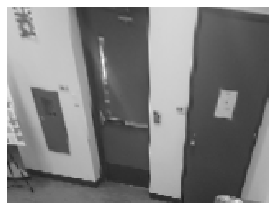

tensor(0.3510, device='cuda:0')
[Epoch 19] loss: 68.666 time used: 0.110


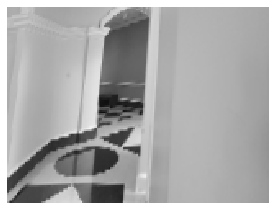

tensor(0.3510, device='cuda:0')
[Epoch 20] loss: 68.666 time used: 0.108
checkpoint saved


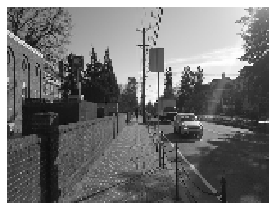

tensor(0.3510, device='cuda:0')
[Epoch 21] loss: 68.666 time used: 0.141


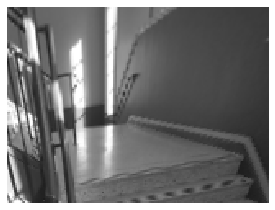

tensor(0.3510, device='cuda:0')
[Epoch 22] loss: 68.666 time used: 0.106


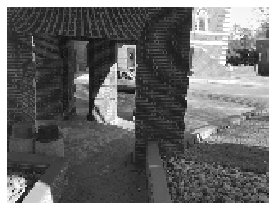

tensor(0.3510, device='cuda:0')
[Epoch 23] loss: 68.666 time used: 0.108


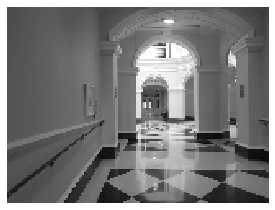

tensor(0.3510, device='cuda:0')
[Epoch 24] loss: 68.666 time used: 0.115


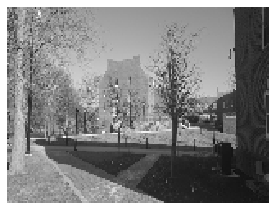

tensor(0.3510, device='cuda:0')
[Epoch 25] loss: 68.666 time used: 0.115


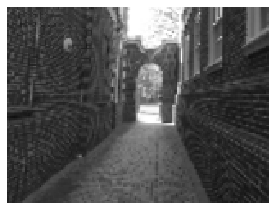

tensor(0.3510, device='cuda:0')
[Epoch 26] loss: 68.666 time used: 0.128


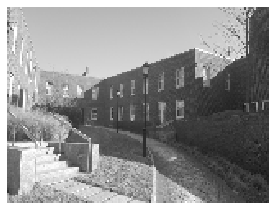

tensor(0.3510, device='cuda:0')
[Epoch 27] loss: 68.666 time used: 0.109


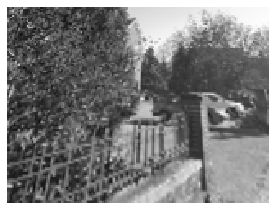

tensor(0.3510, device='cuda:0')
[Epoch 28] loss: 68.666 time used: 0.109


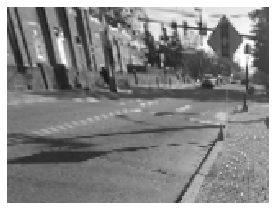

tensor(0.3510, device='cuda:0')
[Epoch 29] loss: 68.666 time used: 0.119


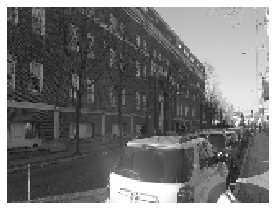

tensor(0.3510, device='cuda:0')
[Epoch 30] loss: 68.666 time used: 0.122


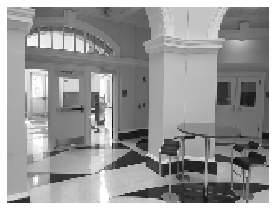

tensor(0.3510, device='cuda:0')
[Epoch 31] loss: 68.666 time used: 0.107


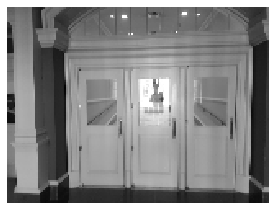

tensor(0.3510, device='cuda:0')
[Epoch 32] loss: 68.666 time used: 0.110


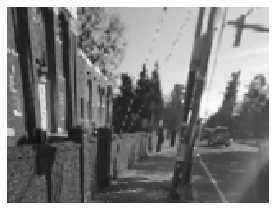

tensor(0.3510, device='cuda:0')
[Epoch 33] loss: 68.666 time used: 0.114


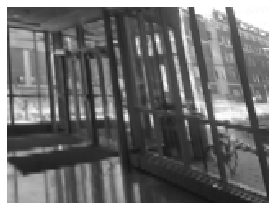

tensor(0.3510, device='cuda:0')
[Epoch 34] loss: 68.666 time used: 0.132


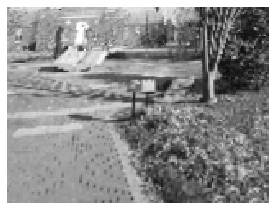

tensor(0.3510, device='cuda:0')
[Epoch 35] loss: 68.666 time used: 0.156


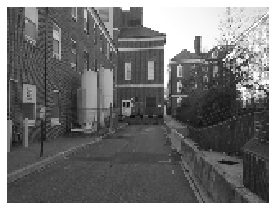

tensor(0.3510, device='cuda:0')
[Epoch 36] loss: 68.666 time used: 0.110


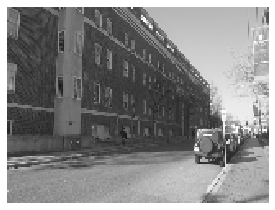

tensor(0.3510, device='cuda:0')
[Epoch 37] loss: 68.666 time used: 0.106


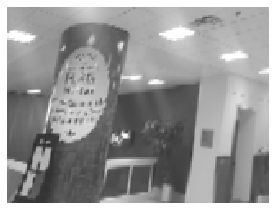

tensor(0.3510, device='cuda:0')
[Epoch 38] loss: 68.666 time used: 0.111


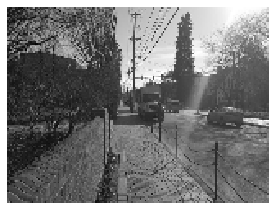

tensor(0.3510, device='cuda:0')
[Epoch 39] loss: 68.666 time used: 0.108


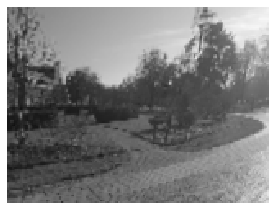

tensor(0.3510, device='cuda:0')
[Epoch 40] loss: 68.666 time used: 0.108
checkpoint saved


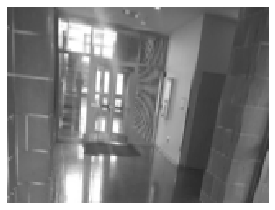

tensor(0.3510, device='cuda:0')
[Epoch 41] loss: 68.666 time used: 0.116


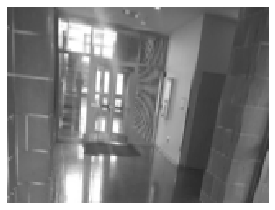

tensor(0.3510, device='cuda:0')
[Epoch 42] loss: 68.666 time used: 0.116


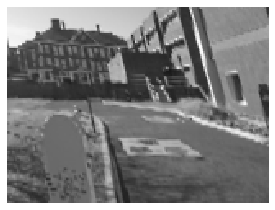

tensor(0.3510, device='cuda:0')
[Epoch 43] loss: 68.666 time used: 0.118


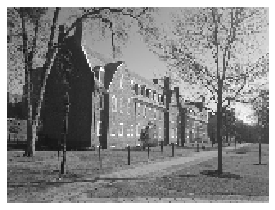

tensor(0.3510, device='cuda:0')
[Epoch 44] loss: 68.666 time used: 0.115


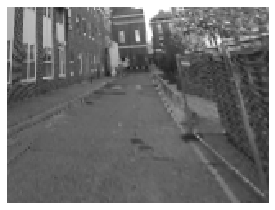

tensor(0.3510, device='cuda:0')
[Epoch 45] loss: 68.666 time used: 0.104


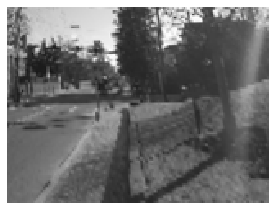

tensor(0.3510, device='cuda:0')
[Epoch 46] loss: 68.666 time used: 0.106


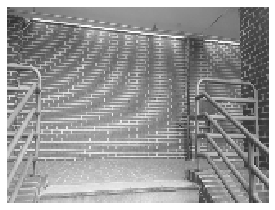

tensor(0.3510, device='cuda:0')
[Epoch 47] loss: 68.666 time used: 0.113


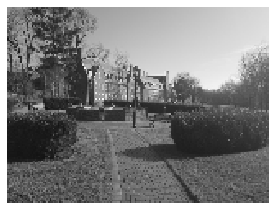

tensor(0.3510, device='cuda:0')
[Epoch 48] loss: 68.666 time used: 0.107


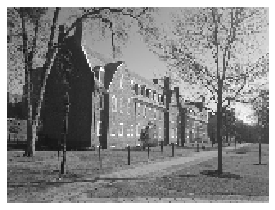

tensor(0.3510, device='cuda:0')
[Epoch 49] loss: 68.666 time used: 0.146


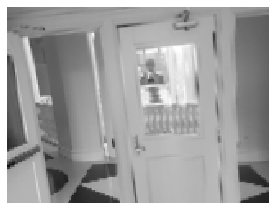

tensor(0.3510, device='cuda:0')
[Epoch 50] loss: 68.666 time used: 0.119


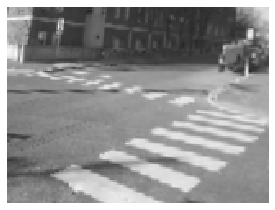

tensor(0.3510, device='cuda:0')
[Epoch 51] loss: 68.666 time used: 0.113


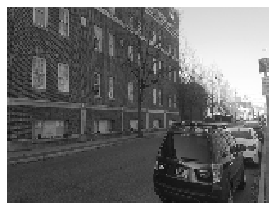

tensor(0.3510, device='cuda:0')
[Epoch 52] loss: 68.666 time used: 0.118


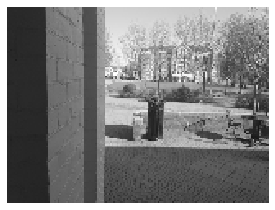

tensor(0.3510, device='cuda:0')
[Epoch 53] loss: 68.666 time used: 0.114


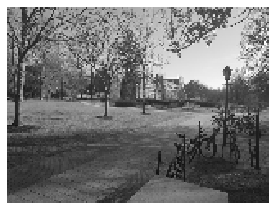

tensor(0.3510, device='cuda:0')
[Epoch 54] loss: 68.666 time used: 0.111


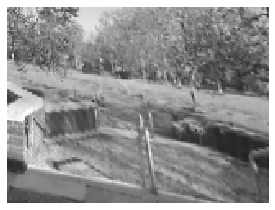

tensor(0.3510, device='cuda:0')
[Epoch 55] loss: 68.666 time used: 0.115


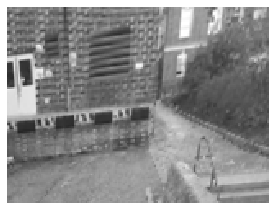

tensor(0.3510, device='cuda:0')
[Epoch 56] loss: 68.666 time used: 0.114


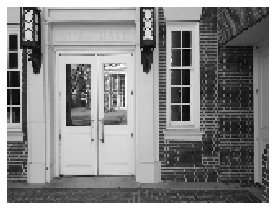

tensor(0.3510, device='cuda:0')
[Epoch 57] loss: 68.666 time used: 0.107


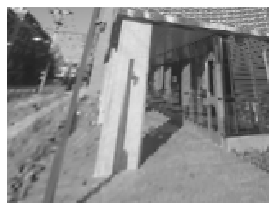

tensor(0.3510, device='cuda:0')
[Epoch 58] loss: 68.666 time used: 0.113


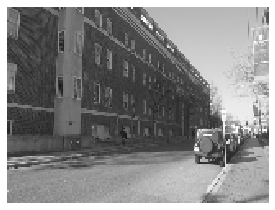

tensor(0.3510, device='cuda:0')
[Epoch 59] loss: 68.666 time used: 0.110


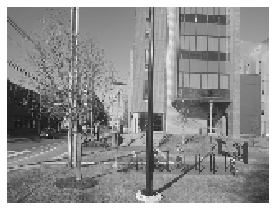

tensor(0.3510, device='cuda:0')


KeyboardInterrupt: 

In [35]:
#total_number = 10765 #output of writeDatabase
batch_size = 512
imgPath = 'D:\\workspace\\proj7643\\train\\train_data\\imgs'
despPath = 'D:\\workspace\\proj7643\\train\\train_data\\descriptors'
trainingset = TrainingSet(imgPath,despPath,total_number)
trainloader = DataLoader(trainingset,batch_size,shuffle=True)
max_epochs = 2000
iters = math.ceil(total_number/batch_size)
for epoch in range(max_epochs):
    avgloss = 0.0 # This loss is the average loss of an epoch
    t0 = time.time()
    for i,data in enumerate(trainloader):
        imgs,desps = data
        #print(imgs.shape)
        #print(desps.shape)
        #temp = imgs[0,:,:,:].reshape(120,160,1)
        #print(temp)
        #img = cv2.cvtColor(np.uint8(temp),cv2.IMREAD_GRAYSCALE)
        #plt.imshow(img)
        #plt.axis('off')
        #plt.show()
        #imgs,desps = data
        #print(imgs.dtype)
        imgs,desps = imgs.to(device=device,dtype=torch.float), desps.to(device=device,dtype=torch.float)
        #cv2.imshow(imgs)
        #print(torch.mean(desps))
        optimizer.zero_grad()
        outputs = model(imgs)
        #print(outputs[22,:])
        #print(desps[0,:])
        loss = criterion(outputs,desps)
        loss.backward()
        optimizer.step()
        #print('loss:%.3f'%loss.item())
        avgloss += loss.item()
        #print('[iteration: %d, loss: %5f]'%(i+1,loss.item()))
        if i%iters==iters-1:#According to the size of the dataset and batchsize
            print('[Epoch %d] loss: %.3f time used: %.3f' %
                      (epoch + 1, avgloss / 70,time.time()-t0))
            avgloss = 0.0
    if epoch%20 == 19:
        torch.save(model.state_dict(), PATH)
        print('checkpoint saved')

# Test and evaluation

In [21]:
from sklearn.metrics import precision_recall_curve, auc
from matplotlib import pyplot as plt, rcParams
import re
from os import path, getcwd, listdir, makedirs
import sys
from matplotlib.font_manager import FontProperties

In [22]:
def smooth_pr(prec, rec):
    """
    Smooths precision recall curve according to TREC standards. Evaluates max precision at each 0.1 recall. Makes the curves look nice and not noisy
    """

    n = len(prec)
    m = 11
    p_smooth = np.zeros((m), dtype=np.float)
    r_smooth = np.linspace(0.0, 1.0, m) 
    for i in range(m):
        j = np.argmin( np.absolute(r_smooth[i] - rec) ) + 1
        p_smooth[i] = np.max( prec[:j] )

    return p_smooth, r_smooth

In [23]:
def check_match(im_lab_k, db_lab, num_include):
    """
    Check if im_lab_k and db_lab are a match, i.e. the two images are less than or equal to
    num_include frames apart. The correct num_include to use depends on the speed of the camera, both for frame rate as well as physical moving speed.
    """	
    if num_include == 1:
        if db_lab ==im_lab_k:
            return True
    else:
        # This assumes that db_lab is a string of numerical characters, which it should be	
        #print int(db_lab)-num_include/2, "<=", int(im_lab_k), "<=", int(db_lab)+num_include/2, "?"
        if (int(db_lab)-num_include/2) <= int(im_lab_k) and int(im_lab_k) <= (int(db_lab)+num_include/2):
            return True

    return False

In [24]:
def computeForwardPass(model, im): 
    ###########################################
    #I tried to pass model as a parameter but it failed:
    #                           'module' object is not callable
     #######################################
    """
    Compute the forward pass for the model
    """
    t0 = time.time()
    img_yuv = cv2.cvtColor(im, cv2.COLOR_BGR2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    im = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    if im.shape[2] > 1:
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = cv2.resize(im, (160, 120), interpolation = cv2.INTER_CUBIC).reshape(1,1,120,160)
    im = torch.from_numpy(im).to(device=device,dtype=torch.float)
    #im = torch.from_numpy(im).float()
    with torch.no_grad():
        
        output = model(im)
        output /= np.linalg.norm(output.cpu())
        descriptor = output
        t_calc = (time.time() - t0)

    return descriptor, t_calc


In [25]:
def get_prec_recall(model,data_path="test_data/CampusLoopDataset", num_include=7, title='Precision-Recall Curve'):
    """
    Input: 
    data_path="test_data/CampusLoopDataset",: Path to data with corresponding images (with corresponding file names) in a <data-dir>/live and <data-dir>/memory
    """
    '''
    model = Model().to(device)
    model.load_state_dict(torch.load(model_path))
    '''
    database = [] # stored pic descriptors
    database_labels = [] # the image labels	

    mem_path = data_path + "\\memory"
    live_path = data_path + "\\live"

    print ("memory path: ", mem_path)
    print ("live path: ", live_path)

    mem_files = [path.join(mem_path, f) for f in listdir(mem_path)]
    live_files = [path.join(live_path, f) for f in listdir(live_path)]

    # same HOG params used to train calc
    hog = cv2.HOGDescriptor((16, 32), (16,16), (16,16), (8,8), 2,1)
    db_hog = []

    t_calc = []

    for fl in mem_files:
        im = cv2.imread(fl)
        print ("loading image ", fl, " to database")
        descriptor, t_r = computeForwardPass(model, im)
        '''
        ################################
        img_yuv = cv2.cvtColor(im, cv2.COLOR_BGR2YUV)
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        im = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

        if im.shape[2] > 1:
            im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im = cv2.resize(im, (160, 120), interpolation = cv2.INTER_CUBIC)
    
    
        with torch.no_grad():
            t0 = time.time()
            output = model(im)
            output /= np.linalg.norm(output)
            descriptor = output
            tr = (time.time() - t0)
        ################################    
        '''
        t_calc.append(t_r)
        database.append(descriptor)
        database_labels.append(re.match('.*?([0-9]+)$', path.splitext(path.basename(fl))[0]).group(1))
        d_hog = hog.compute(cv2.resize(cv2.cvtColor(im,cv2.COLOR_BGR2GRAY), (160, 120), interpolation = cv2.INTER_CUBIC))
        db_hog.append(d_hog/np.linalg.norm(d_hog))
        #print(d_hog)
        #db_hog.append(d_hog)

    #print database

    correct = np.zeros((len(live_files),1),dtype=np.uint8) # the array of true labels of loop closure for precision-recall curve for each net
    scores = np.zeros((len(live_files),1))  # Our "probability function" that  simply uses 1-l2_norm

    correct_hog = []
    scores_hog = []
    
    k=0
    t_q = []
    for fl in live_files:
        im_label_k = re.match('.*?([0-9]+)$', path.splitext(path.basename(fl))[0]).group(1)
        im = cv2.imread(fl)

        descriptor, t_r = computeForwardPass(model, im)
        '''
        ################################
        img_yuv = cv2.cvtColor(im, cv2.COLOR_BGR2YUV)
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        im = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

        if im.shape[2] > 1:
            im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im = cv2.resize(im, (160, 120), interpolation = cv2.INTER_CUBIC)
    
    
        with torch.no_grad():
            t0 = time.time()
            output = model(im)
            output /= np.linalg.norm(output)
            descriptor = output
            tr = (time.time() - t0)
        ################################
        '''
        t_calc.append(t_r)

        d_hog = hog.compute(cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY), (160, 120), interpolation = cv2.INTER_CUBIC))
        d_hog /= np.linalg.norm(d_hog)

        max_sim = -1.0 
        max_sim_hog = -1.0

        i_max_sim = -1 * np.ones(1, dtype=np.int32)
        i_max_sim_hog = -1
        t_q_single = 0.0
        for i in range(len(database)):
            #print(descriptor.dtype)
            #print(database[i].dtype)
            #print(descriptor.shape)
            #print(database[i].shape)
            #print(descriptor.squeeze())
            #print(database[i].squeeze())
            #curr_sim = torch.dot(descriptor.squeeze(), database[i].squeeze())# Normalizd vectors means that this give cosine similarity
            t0 = time.time()
            curr_sim = np.dot(descriptor.cpu(), database[i].cpu().T)
            print(curr_sim)
            if curr_sim > max_sim: 
                max_sim = curr_sim
                i_max_sim = i
            t1 = time.time()

            curr_sim_hog = np.squeeze(np.dot(d_hog.T,  db_hog[i])) 
            if curr_sim_hog > max_sim_hog: 
                max_sim_hog = curr_sim_hog
                i_max_sim_hog = i
            t_q_single+=(t1-t0)
            #print(t1-t0)
        
        #scores[k] = max_sim.cpu()
        t0 = time.time()
        scores[k] = max_sim
        db_lab = database_labels[i_max_sim]  
        if check_match(im_label_k, db_lab, num_include):
            correct[k] = 1
            # else already 0
        #print(len(database_labels))
        #print(correct.shape)
        #print(i_max_sim)
        #print(k)
        t1 = time.time()
        t_q_single+=(t1-t0)
        t_q.append(t_q_single)
        print(t_q_single)
        print ("Proposed match calc:", im_label_k, ", ", database_labels[i_max_sim], ", score = ", max_sim, ", Correct =", correct[k])

        scores_hog.append( max_sim_hog )
        db_lab_hog = database_labels[i_max_sim_hog]  
        if check_match(im_label_k, db_lab_hog, num_include):
            correct_hog.append(1)
        else:
            correct_hog.append(0)
        print ("Proposed match HOG:", im_label_k, ", ", database_labels[i_max_sim_hog], ", score = ", max_sim_hog,", Correct =", correct_hog[-1])

        print ("\n")
        k += 1

    precisions = []
    recalls = []
    threshold = -1.0

    precision, recall, threshold = precision_recall_curve(correct, scores)
    precisions.append(precision)
    recalls.append(recall)
    # Only get threshold if there's one net. Otherwise we're just coparing them and don't care about a threshold yet
    perf_prec = abs(precision[:-1] - 1.0) <= 1e-6
    #print(precision)
    #print(perf_prec)
    if np.any(perf_prec):
        # We want the highest recall rate with perfect precision as our a-priori threshold
        threshold = np.min(threshold[perf_prec]) # get the largest threshold so that presicion is 1
        #print(threshold.shape)
        print ("\nThreshold for max recall with 1.0 precision = %f" % (threshold) )

    precision_hog, recall_hog, thresholds_hog = precision_recall_curve(correct_hog, scores_hog)
    t_calc = np.asarray(t_calc)
    t_q = np.asarray(t_q)
    #print(t_calc.shape)
    print ("Mean calc compute time = ", np.sum(t_calc)/ np.size(t_calc))
    print ("Mean query compute time = ", np.sum(t_q)/ np.size(t_q))
    

    return precisions, recalls,precision_hog, recall_hog

In [26]:
def plot(model, data_path="test_data/CampusLoopDataset", num_include=7, title='Precision-Recall Curve'):
    """
    Plot the precision recall curve to compare CALC to other methods, or cross validate different iterations of a CALC model.
    """
        
    t0 = time.time()

    precisions, recalls, precision_hog, recall_hog = get_prec_recall(model,data_path, num_include, title)

    rcParams['font.sans-serif'] = 'DejaVu Sans'
    rcParams['font.weight'] = 'bold'
    rcParams['axes.titleweight'] = 'bold'	
    rcParams['axes.labelweight'] = 'bold'	
    rcParams['axes.labelsize'] = 'large'	
    rcParams['figure.figsize'] = [8.0, 4.0]	
    rcParams['figure.subplot.bottom'] = 0.2	
    plots = path.join(getcwd(), "plots")
    rcParams['savefig.directory'] = plots
    if not path.isdir(plots):
        makedirs(plots)

    lines = ['-','--','-.',':','.',',','o','v','^','<','>','1','2','3','4','s','p','*','h','H','+','x','D','d','|','_']

    ax = plt.gca()
    best_auc = -1 
    lab_best_auc = ""
    handles = []
    p_smooth, r_smooth = smooth_pr(precisions, recalls)
    curr_auc = auc(r_smooth, p_smooth)
    label = ' (AUC=%0.2f)' % (curr_auc)

    calc_plt, = ax.plot(r_smooth, p_smooth, '-', label=label, linewidth=2)

    handles.append(calc_plt)
    if curr_auc > best_auc:
        lab_best_auc = label
        best_auc = curr_auc	
    # Only tell the user the most accurate net if they loaded more than one!
    if len(precisions) > 1:
        print("Model with highest AUC:", lab_best_auc)


    print ("\n\n\n\n")
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.title(title)

    p_smooth, r_smooth = smooth_pr(precision_hog, recall_hog)
    lab = 'HOG (AUC=%0.2f)' % (auc(r_smooth, p_smooth))
    hog_plt, = ax.plot(r_smooth, p_smooth, '-.', label=lab, linewidth=2)
    handles.append(hog_plt)
    fontP = FontProperties()
    fontP.set_size('small')
    leg = ax.legend(handles=handles, fancybox=True, ncol = (1 + int(len(precisions)/30)), loc='best', prop=fontP)
    leg.get_frame().set_alpha(0.5) # transluscent legend 
    leg.set_draggable(True)
    for line in leg.get_lines():
        line.set_linewidth(3)

    print ("Elapsed time = ", time.time()-t0, " sec")
    plt.show()

memory path:  D:\workspace\data\dataset\06\test\memory
live path:  D:\workspace\data\dataset\06\test\live
loading image  D:\workspace\data\dataset\06\test\memory\Image1.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image10.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image100.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image101.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image102.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image103.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image104.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image105.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image106.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image107.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image108.png  to data

loading image  D:\workspace\data\dataset\06\test\memory\Image55.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image56.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image57.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image58.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image59.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image6.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image60.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image61.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image62.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image63.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image64.png  to database
loading image  D:\workspace\data\dataset\06\test\memory\Image65.png  to database
loading image  D:\workspace\d

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
0.06981325149536133
Proposed match calc: 108 ,  1 , score =  [[0.9999998]] ,

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
0.0688164234161377
Proposed match calc: 111 ,  1 , score =  [[0.9999998]] , Correct = [0]
Proposed match HOG: 111 ,  115 , score =  0.99847317 , Correct = 0


[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
0.06482791900634766
Proposed match calc: 123 ,  1 , score =  [[0.9999998]] , Correct = [0]
Proposed match HOG: 123 ,  126 , score =  0.99536145 , Correct = 1


[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]


[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

Proposed match HOG: 138 ,  142 , score =  0.9995158 , Correct = 0


[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
0.06377601623535156
Proposed match calc: 20 ,  1 , score =  [[0.9999998]] , Correct = [0]
Proposed match HOG: 20 ,  23 , score =  0.99848855 , Correct = 1


[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
0.061399221420288086
Proposed match calc: 29 ,  1 , score =  [[0.9999998]] , Correct = [0]
Proposed match HOG: 29 ,  33 , score =  0.99857044 , Correct = 0


[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
0.06747102737426758
Proposed match calc: 40 ,  1 , score =  [[0.9999998]] , Correct = [0]
Proposed match HOG: 40 ,  44 , score =  0.9984158 , Correct = 0


[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
0.06382966041564941
Proposed match calc: 60 ,  1 , score =  [[0.9999998]] , Correct = [0]
Proposed match HOG: 60 ,  81 , score =  0.9954731 , Correct = 0


[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
0.06383013725280762
Proposed match calc: 69 ,  1 , score =  [[0.9999998]] , Correct = [0]
Proposed match HOG: 69 ,  73 , score =  0.9970093 , Correct = 0


[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
0.06582427024841309
Proposed match calc: 77 ,  1 , score =  [[0.9999998]] , Correct = [0]
Proposed match

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
0.06440925598144531
Proposed match calc: 80 ,  1 , score =  [[0.9999998]] , Correct = [0]
Proposed match HOG: 80 ,  84 , score =  0.99674666 , Correct = 0


[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
0.06284952163696289
Proposed match calc: 89 ,  1 , score =  [[0.9999998]] , Correct = [0]
Proposed match HOG: 89 ,  93 , score =  0.99885774 , Correct = 0


[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.9999998]]
[[0.99

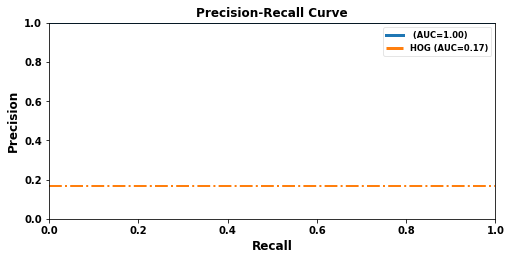

In [27]:
modelpath = PATH
datapath = 'D:\\workspace\\data\\dataset\\06\\test'
#datapath = 'D:\\workspace\\data\\spring_summer'
plot(model,datapath)

In [33]:
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F
device  = torch.device("cuda:0")
alexnet = models.alexnet(pretrained=True,progress=True).to(device)
#print(alexnet)
#print(alexnet.features[0].parameters())

In [36]:
#print(alexnet)
#alexnet = alexnet.to(device)
alexnet.features[0] = nn.Conv2d(in_channels=1,out_channels=64,kernel_size=11,stride=4,padding=2)
alexnet.classifier[6] = nn.Linear(4096,3648)
lr = 1e-5
#optimizer = optim.Adam(alexnet.parameters(), lr=lr,weight_decay=0.995)

#in_layer_params = list(alexnet.features[0].parameters())
#out_layer1_params = list(alexnet.classifier[6].parameters())
#out_layer2_params = list(alexnet.classifier[4].parameters())
#out_layer3_params = list(alexnet.classifier[1].parameters())
#print(alexnet.features[0])
#base_params = filter(lambda p: id(p) not in in_layer_params+out_layer1_params+out_layer2_params+out_layer3_params,alexnet.parameters())
#base_params2 = list(map(id, alexnet.avgpool[0].parameters()))
#base_params3 = filter(lambda p: id(p) not in out_layer1_params+out_layer2_params+out_layer3_params,alexnet.classifier.parameters())

#for i in optimizer.param_groups:
#    print(i)
#    for k,v in i.items():
#        print(k)
#print(in_layer_params,out_layer1_params,out_layer2_params,out_layer3_params)
#print(base_params2)
optimizer = optim.Adam([{'params': alexnet.features[0].parameters()},
                        {'params': alexnet.classifier[6].parameters(),'lr': lr*1e5},
                        {'params': alexnet.classifier[4].parameters(),'lr': lr*1e5},
                        {'params': alexnet.classifier[1].parameters(),'lr': lr*1e5}],
                       lr=lr,weight_decay=0.995)
alexnet.cuda()

AlexNet(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [30]:
PATH = 'model\\alexnet.pth'
#model.load_state_dict(torch.load(PATH))
#criterion = nn.MSELoss(reduction = 'sum')
criterion = nn.L1Loss(reduction = 'sum')

total_number = 10765 #output of writeDatabase
batch_size = 512
imgPath = 'D:\\workspace\\proj7643\\train\\train_data\\imgs'
despPath = 'D:\\workspace\\proj7643\\train\\train_data\\descriptors'
trainingset = TrainingSet(imgPath,despPath,total_number)
trainloader = DataLoader(trainingset,batch_size,shuffle=True)
max_epochs = 2000
iters = math.ceil(total_number/batch_size)
for epoch in range(max_epochs):
    avgloss = 0.0 # This loss is the average loss of an epoch
    t0 = time.time()
    for i,data in enumerate(trainloader):
        imgs,desps = data

        imgs,desps = imgs.to(device=device,dtype=torch.float), desps.to(device=device,dtype=torch.float)
        optimizer.zero_grad()
        outputs = alexnet(imgs)
        loss = criterion(outputs,desps)
        loss.backward()
        optimizer.step()
        avgloss += loss.item()
        if i%iters==iters-1:#According to the size of the dataset and batchsize
            print('[Epoch %d] loss: %.3f time used: %.3f' %
                      (epoch + 1, avgloss / 70,time.time()-t0))
            avgloss = 0.0
    if epoch%20 == 19:
        torch.save(alexnet.state_dict(), PATH)
        print('checkpoint saved')

[Epoch 1] loss: 23356083561852.438 time used: 3.282
[Epoch 2] loss: 438276501264.000 time used: 3.185
[Epoch 3] loss: 9604394555.359 time used: 2.969
[Epoch 4] loss: 20848319799.579 time used: 2.973
[Epoch 5] loss: 21058995825.491 time used: 2.973
[Epoch 6] loss: 29452492646.327 time used: 2.973
[Epoch 7] loss: 5936562010.072 time used: 2.974
[Epoch 8] loss: 32063780.135 time used: 2.996
[Epoch 9] loss: 27773446.849 time used: 2.980
[Epoch 10] loss: 7573531.016 time used: 3.033
[Epoch 11] loss: 47136344.485 time used: 2.999
[Epoch 12] loss: 2202352197.197 time used: 2.988
[Epoch 13] loss: 8064915.068 time used: 3.008
[Epoch 14] loss: 17665503.254 time used: 2.981
[Epoch 15] loss: 81592445.341 time used: 3.006
[Epoch 16] loss: 65902.953 time used: 2.987
[Epoch 17] loss: 64899.518 time used: 3.012
[Epoch 18] loss: 63109.374 time used: 3.194
[Epoch 19] loss: 62826.158 time used: 3.108
[Epoch 20] loss: 63179.412 time used: 3.067
checkpoint saved
[Epoch 21] loss: 62449.825 time used: 3.122


KeyboardInterrupt: 

memory path:  D:\workspace\proj7643\CampusLoopDataset\memory
live path:  D:\workspace\proj7643\CampusLoopDataset\live
loading image  D:\workspace\proj7643\CampusLoopDataset\memory\Image001.jpg  to database
loading image  D:\workspace\proj7643\CampusLoopDataset\memory\Image002.jpg  to database
loading image  D:\workspace\proj7643\CampusLoopDataset\memory\Image003.jpg  to database
loading image  D:\workspace\proj7643\CampusLoopDataset\memory\Image004.jpg  to database
loading image  D:\workspace\proj7643\CampusLoopDataset\memory\Image005.jpg  to database
loading image  D:\workspace\proj7643\CampusLoopDataset\memory\Image006.jpg  to database
loading image  D:\workspace\proj7643\CampusLoopDataset\memory\Image007.jpg  to database
loading image  D:\workspace\proj7643\CampusLoopDataset\memory\Image008.jpg  to database
loading image  D:\workspace\proj7643\CampusLoopDataset\memory\Image009.jpg  to database
loading image  D:\workspace\proj7643\CampusLoopDataset\memory\Image010.jpg  to database
lo

[[0.7658615]]
[[0.764876]]
[[0.825986]]
[[0.81217295]]
[[0.8086739]]
[[0.8400196]]
[[0.8215388]]
[[0.82689136]]
[[0.82289267]]
[[0.7852199]]
[[0.7462629]]
[[0.785489]]
[[0.79075015]]
[[0.8098709]]
[[0.77157867]]
[[0.77503145]]
[[0.8083731]]
[[0.8062731]]
[[0.7833917]]
[[0.7999441]]
[[0.68928254]]
[[0.792008]]
[[0.80240273]]
[[0.7627408]]
[[0.709522]]
[[0.82393265]]
[[0.78200483]]
[[0.8252302]]
[[0.6920946]]
[[0.80734754]]
[[0.80456364]]
[[0.81948173]]
[[0.8019817]]
[[0.81383383]]
[[0.82372355]]
[[0.75849766]]
[[0.80686814]]
[[0.7036402]]
[[0.80692667]]
[[0.8126509]]
[[0.82744765]]
[[0.80435]]
[[0.8175222]]
[[0.84486264]]
[[0.8100773]]
[[0.72754055]]
[[0.752662]]
[[0.7610359]]
[[0.8012833]]
[[0.7892545]]
[[0.8255404]]
[[0.83373904]]
[[0.8328686]]
[[0.7630172]]
[[0.8428292]]
[[0.76974237]]
[[0.7863997]]
[[0.8050233]]
[[0.8303087]]
[[0.8386668]]
0.040915727615356445
Proposed match calc: 002 ,  011 , score =  [[0.8596905]] , Correct = [0]
Proposed match HOG: 002 ,  061 , score =  0.9990511

[[0.7527019]]
[[0.7893504]]
[[0.8247011]]
[[0.7926965]]
[[0.8199997]]
[[0.82763475]]
[[0.8416056]]
[[0.8374102]]
[[0.82393503]]
[[0.8423121]]
[[0.8204647]]
[[0.8151059]]
[[0.830387]]
[[0.80038124]]
[[0.7645906]]
[[0.7398007]]
[[0.79964536]]
[[0.7730161]]
[[0.8218093]]
[[0.8146323]]
[[0.794502]]
[[0.8112974]]
[[0.8496351]]
[[0.81298524]]
[[0.79530996]]
[[0.83351624]]
[[0.74748915]]
[[0.80032647]]
[[0.83612007]]
[[0.8347999]]
[[0.8034621]]
[[0.8175726]]
[[0.8359197]]
[[0.8375268]]
[[0.79432523]]
[[0.7959718]]
[[0.84480774]]
[[0.7860619]]
[[0.8179339]]
[[0.80844045]]
[[0.8419527]]
[[0.752754]]
[[0.82387936]]
[[0.81524116]]
[[0.66926384]]
[[0.7688416]]
[[0.75535256]]
[[0.8167069]]
[[0.71162295]]
[[0.7992072]]
[[0.7799666]]
[[0.7965739]]
[[0.7294974]]
[[0.8365523]]
[[0.8201849]]
[[0.8161302]]
[[0.8159877]]
[[0.80664015]]
[[0.8267516]]
[[0.69898444]]
[[0.82175344]]
[[0.72041607]]
[[0.8142447]]
[[0.8057022]]
[[0.82621396]]
[[0.805088]]
[[0.84780526]]
[[0.8317285]]
[[0.7871614]]
[[0.7712287]]


Proposed match HOG: 015 ,  061 , score =  0.9973829 , Correct = 0


[[0.8039311]]
[[0.7821802]]
[[0.8069738]]
[[0.85280895]]
[[0.8151634]]
[[0.79808235]]
[[0.80917823]]
[[0.82884276]]
[[0.8161104]]
[[0.79724675]]
[[0.78238225]]
[[0.81216264]]
[[0.8179566]]
[[0.7788265]]
[[0.8187149]]
[[0.8487973]]
[[0.78023314]]
[[0.7739336]]
[[0.7845528]]
[[0.78932977]]
[[0.7799953]]
[[0.8107842]]
[[0.8472051]]
[[0.8339082]]
[[0.81316704]]
[[0.80108017]]
[[0.7934525]]
[[0.8007469]]
[[0.8634505]]
[[0.77719665]]
[[0.77395296]]
[[0.7740375]]
[[0.7949873]]
[[0.799912]]
[[0.8363392]]
[[0.82770896]]
[[0.77332866]]
[[0.8295845]]
[[0.82621825]]
[[0.81111586]]
[[0.82604617]]
[[0.8285736]]
[[0.78675616]]
[[0.84446806]]
[[0.78879833]]
[[0.8050484]]
[[0.8029972]]
[[0.801511]]
[[0.8237425]]
[[0.82926]]
[[0.803769]]
[[0.80740976]]
[[0.833866]]
[[0.7823803]]
[[0.8353679]]
[[0.8404442]]
[[0.8235642]]
[[0.77541196]]
[[0.8119916]]
[[0.835966]]
[[0.73576427]]
[[0.77325296]]
[[0.7925536]]
[[0.8549776]]
[[0.76918507]]
[[0

[[0.8743349]]
[[0.86483]]
[[0.87679553]]
[[0.8751936]]
[[0.8459604]]
[[0.7929052]]
[[0.7851687]]
[[0.7954428]]
[[0.8712527]]
[[0.83993447]]
[[0.8657098]]
[[0.8628261]]
[[0.87535954]]
[[0.83264273]]
[[0.8506239]]
[[0.84399307]]
[[0.8567641]]
[[0.8255167]]
[[0.85113674]]
[[0.85668194]]
0.04088997840881348
Proposed match calc: 022 ,  021 , score =  [[0.89391404]] , Correct = [1]
Proposed match HOG: 022 ,  014 , score =  0.9887713 , Correct = 0


[[0.81804013]]
[[0.83272594]]
[[0.84115696]]
[[0.85360646]]
[[0.8514461]]
[[0.8178619]]
[[0.8689842]]
[[0.84947264]]
[[0.84266436]]
[[0.8630601]]
[[0.85187864]]
[[0.82929647]]
[[0.830088]]
[[0.85264015]]
[[0.80351794]]
[[0.80286676]]
[[0.8102262]]
[[0.8419726]]
[[0.86540484]]
[[0.84481215]]
[[0.8634765]]
[[0.85791874]]
[[0.8492714]]
[[0.8353577]]
[[0.86336476]]
[[0.8533928]]
[[0.8655164]]
[[0.8644644]]
[[0.85871184]]
[[0.8408783]]
[[0.8019855]]
[[0.8121393]]
[[0.83911353]]
[[0.8445119]]
[[0.84072685]]
[[0.83733493]]
[[0.8723104]]
[[0.82373255]]
[[

[[0.810491]]
[[0.8517026]]
[[0.82837427]]
[[0.8388662]]
[[0.83936334]]
[[0.83950865]]
[[0.83890486]]
[[0.8516041]]
[[0.8445587]]
[[0.8257443]]
[[0.81438565]]
[[0.82178956]]
[[0.85473216]]
[[0.8204267]]
[[0.80868113]]
[[0.8567785]]
[[0.83567286]]
[[0.78801364]]
[[0.84632957]]
[[0.872524]]
[[0.75335217]]
[[0.82384443]]
[[0.827717]]
[[0.8618456]]
[[0.7964787]]
[[0.81980854]]
[[0.8339058]]
[[0.80204844]]
[[0.8164122]]
[[0.8085525]]
[[0.85580117]]
[[0.8223611]]
[[0.84475553]]
[[0.81486785]]
[[0.80167115]]
[[0.7559545]]
[[0.8296486]]
[[0.7765607]]
[[0.8065038]]
[[0.82464015]]
[[0.8588526]]
[[0.84014636]]
[[0.8568765]]
[[0.81530523]]
[[0.7907596]]
[[0.8419461]]
[[0.79641956]]
[[0.77743727]]
[[0.8091117]]
[[0.81388915]]
[[0.82150185]]
[[0.82545567]]
[[0.8132893]]
[[0.8132005]]
[[0.7648051]]
[[0.801986]]
[[0.8163515]]
[[0.8148354]]
[[0.82324266]]
[[0.7808273]]
0.04285788536071777
Proposed match calc: 029 ,  060 , score =  [[0.872524]] , Correct = [0]
Proposed match HOG: 029 ,  061 , score =  0.

[[0.7972181]]
[[0.84036237]]
[[0.80718595]]
[[0.81360936]]
[[0.8092931]]
[[0.74721366]]
[[0.8155746]]
[[0.7610549]]
[[0.74999785]]
[[0.8223357]]
[[0.74866354]]
[[0.7831229]]
[[0.76439345]]
[[0.7858106]]
[[0.78100324]]
[[0.75784934]]
[[0.7814367]]
[[0.8100033]]
[[0.8283475]]
[[0.78511417]]
[[0.7676964]]
[[0.7815452]]
[[0.80911267]]
[[0.7725561]]
[[0.759915]]
[[0.768065]]
[[0.7774843]]
[[0.78931904]]
[[0.77606076]]
[[0.79261416]]
[[0.8221786]]
[[0.8540728]]
[[0.8014052]]
[[0.8042466]]
[[0.8014938]]
[[0.78719866]]
[[0.80716497]]
[[0.81234026]]
[[0.7828141]]
[[0.8417848]]
[[0.8565519]]
[[0.7936717]]
[[0.8656572]]
[[0.82607377]]
[[0.77118194]]
[[0.80345166]]
[[0.83435583]]
[[0.82173324]]
[[0.84880674]]
[[0.7957461]]
[[0.75553346]]
[[0.7744148]]
[[0.7612215]]
[[0.8089333]]
[[0.77881277]]
[[0.7881816]]
[[0.8193277]]
[[0.8044582]]
[[0.76465434]]
[[0.7819452]]
[[0.7747469]]
[[0.8102986]]
[[0.8021366]]
[[0.7520821]]
[[0.7766105]]
[[0.8195449]]
[[0.79769135]]
[[0.77215713]]
[[0.73151255]]
[[0.768

[[0.8011433]]
[[0.79625165]]
[[0.7244193]]
[[0.80910563]]
[[0.7241808]]
[[0.83583516]]
[[0.8262869]]
[[0.8516254]]
[[0.8475468]]
[[0.87251675]]
[[0.82038283]]
[[0.8275908]]
[[0.7508547]]
[[0.80210906]]
[[0.77542746]]
[[0.8058502]]
[[0.81547856]]
[[0.8346214]]
[[0.8517744]]
[[0.8077369]]
[[0.75262725]]
[[0.81393945]]
[[0.7934046]]
[[0.8014647]]
[[0.8052636]]
[[0.8166618]]
[[0.8112304]]
0.042884111404418945
Proposed match calc: 042 ,  083 , score =  [[0.87251675]] , Correct = [0]
Proposed match HOG: 042 ,  061 , score =  0.9988007 , Correct = 0


[[0.83760095]]
[[0.81141174]]
[[0.800881]]
[[0.8138371]]
[[0.83026016]]
[[0.77148354]]
[[0.8422778]]
[[0.8090158]]
[[0.77182174]]
[[0.8332165]]
[[0.79200387]]
[[0.80845]]
[[0.8458415]]
[[0.7945365]]
[[0.76030326]]
[[0.78428507]]
[[0.81437755]]
[[0.7946663]]
[[0.81291527]]
[[0.7846961]]
[[0.79228806]]
[[0.79168916]]
[[0.8086407]]
[[0.78835076]]
[[0.8077085]]
[[0.76711476]]
[[0.80142426]]
[[0.81422496]]
[[0.79772425]]
[[0.7831278]]
[[0.8068472]]
[

[[0.8260332]]
[[0.8275399]]
[[0.84819955]]
[[0.8540454]]
[[0.84314483]]
[[0.8465237]]
[[0.8397007]]
[[0.8421357]]
[[0.7685684]]
[[0.7964597]]
[[0.8186207]]
[[0.8233072]]
[[0.8426852]]
[[0.801899]]
[[0.8244169]]
[[0.79047287]]
[[0.84833974]]
[[0.8620462]]
[[0.70167905]]
[[0.85331476]]
[[0.8255962]]
[[0.79254997]]
[[0.7283911]]
[[0.78572077]]
[[0.8194878]]
[[0.7928984]]
[[0.74094653]]
[[0.83990324]]
[[0.82019323]]
[[0.83335793]]
[[0.8068251]]
[[0.8289419]]
[[0.8257654]]
[[0.71290797]]
[[0.83061886]]
[[0.7478558]]
[[0.8341981]]
[[0.8366195]]
[[0.848495]]
[[0.85237044]]
[[0.841679]]
[[0.8474234]]
[[0.83498716]]
[[0.73612976]]
[[0.84275657]]
[[0.7679244]]
[[0.83677953]]
[[0.8241408]]
[[0.8427745]]
[[0.85570157]]
[[0.8320612]]
[[0.7659846]]
[[0.81764567]]
[[0.81545925]]
[[0.79594445]]
[[0.79585445]]
[[0.8077041]]
[[0.8388921]]
0.041880130767822266
Proposed match calc: 049 ,  060 , score =  [[0.8620462]] , Correct = [0]
Proposed match HOG: 049 ,  061 , score =  0.99825144 , Correct = 0


[[0.

[[0.82320595]]
[[0.8041471]]
[[0.8471754]]
[[0.856455]]
[[0.8648749]]
[[0.82402766]]
[[0.8488191]]
[[0.8204523]]
[[0.8596082]]
[[0.83593774]]
[[0.84204257]]
[[0.815919]]
[[0.8278078]]
[[0.83751416]]
[[0.79005015]]
[[0.7790325]]
[[0.81627345]]
[[0.81641847]]
[[0.8433329]]
[[0.8265412]]
[[0.8623402]]
[[0.8461404]]
[[0.83874583]]
[[0.87480783]]
[[0.8841819]]
[[0.8462001]]
[[0.8354666]]
[[0.8472042]]
[[0.8362415]]
[[0.84268504]]
[[0.81087947]]
[[0.8025993]]
[[0.85658693]]
[[0.8011643]]
[[0.8118893]]
[[0.852741]]
[[0.8394365]]
[[0.8345374]]
[[0.8456528]]
[[0.8413639]]
[[0.8058224]]
[[0.8278252]]
[[0.81359327]]
[[0.8252444]]
[[0.8550843]]
[[0.8652586]]
[[0.84738135]]
[[0.8278588]]
[[0.85435754]]
[[0.82791805]]
[[0.7726859]]
[[0.81999147]]
[[0.8336961]]
[[0.8456861]]
[[0.84715337]]
[[0.82362]]
[[0.84668]]
[[0.80043757]]
[[0.83405477]]
[[0.8390785]]
[[0.7011699]]
[[0.7875856]]
[[0.82331836]]
[[0.7941866]]
[[0.74857223]]
[[0.8038585]]
[[0.82687545]]
[[0.80851465]]
[[0.7365885]]
[[0.85210395]]
[

[[0.8081955]]
0.03989887237548828
Proposed match calc: 062 ,  089 , score =  [[0.87205833]] , Correct = [0]
Proposed match HOG: 062 ,  061 , score =  0.99592876 , Correct = 1


[[0.81217384]]
[[0.820452]]
[[0.81866664]]
[[0.8283451]]
[[0.83246994]]
[[0.7499027]]
[[0.8486737]]
[[0.81013066]]
[[0.8026314]]
[[0.83266735]]
[[0.7829269]]
[[0.8111968]]
[[0.8236296]]
[[0.78050673]]
[[0.8367498]]
[[0.8228358]]
[[0.8365878]]
[[0.75732106]]
[[0.8111099]]
[[0.79594624]]
[[0.7729957]]
[[0.769444]]
[[0.84066266]]
[[0.82946366]]
[[0.80177546]]
[[0.7908155]]
[[0.75922304]]
[[0.76569045]]
[[0.7884075]]
[[0.777063]]
[[0.81221116]]
[[0.7992891]]
[[0.8250334]]
[[0.8098103]]
[[0.81305224]]
[[0.8244333]]
[[0.8150309]]
[[0.79480684]]
[[0.82278484]]
[[0.8529991]]
[[0.8247147]]
[[0.8264015]]
[[0.81770027]]
[[0.8008394]]
[[0.7984009]]
[[0.83406764]]
[[0.8513036]]
[[0.8304901]]
[[0.83425635]]
[[0.802991]]
[[0.76576173]]
[[0.8107122]]
[[0.78983444]]
[[0.80572927]]
[[0.8097236]]
[[0.8031495]]
[[0.81919193]]
[[0.7

[[0.6489264]]
[[0.71685106]]
[[0.74542236]]
[[0.69672865]]
[[0.74546325]]
[[0.78689015]]
[[0.7692545]]
[[0.72191674]]
[[0.76937985]]
[[0.77186495]]
[[0.7568753]]
[[0.7558596]]
[[0.75309896]]
[[0.7725898]]
[[0.7714198]]
[[0.8036172]]
[[0.7609609]]
[[0.72520876]]
[[0.7428535]]
[[0.7700317]]
[[0.75935465]]
[[0.7691765]]
[[0.77963793]]
[[0.7294749]]
[[0.74282146]]
[[0.7324939]]
[[0.75631183]]
[[0.72931623]]
[[0.7501184]]
[[0.7460059]]
[[0.7768979]]
[[0.69863844]]
[[0.745767]]
[[0.7738513]]
[[0.7405103]]
[[0.7322034]]
[[0.7255221]]
[[0.751655]]
[[0.73948044]]
[[0.7024116]]
[[0.76880544]]
[[0.74561656]]
[[0.7688334]]
[[0.7068044]]
[[0.7674963]]
[[0.73849916]]
[[0.7810687]]
[[0.7591026]]
[[0.7706157]]
[[0.7064017]]
[[0.7908385]]
[[0.7973341]]
[[0.7161804]]
[[0.7807187]]
[[0.7108411]]
[[0.7685144]]
[[0.75410604]]
[[0.71086454]]
[[0.68406034]]
[[0.78049433]]
[[0.75176996]]
[[0.7309317]]
[[0.75945276]]
[[0.74538517]]
[[0.7415979]]
[[0.76433086]]
[[0.727288]]
[[0.75627315]]
[[0.6516416]]
[[0.7635

[[0.8401116]]
[[0.8181559]]
[[0.8581198]]
[[0.8054553]]
0.040840864181518555
Proposed match calc: 075 ,  099 , score =  [[0.8581198]] , Correct = [0]
Proposed match HOG: 075 ,  073 , score =  0.9984018 , Correct = 1


[[0.82416856]]
[[0.7954811]]
[[0.8095646]]
[[0.8458152]]
[[0.83917916]]
[[0.781509]]
[[0.826336]]
[[0.8260745]]
[[0.87085605]]
[[0.8409972]]
[[0.85357755]]
[[0.8516698]]
[[0.81190836]]
[[0.8514661]]
[[0.807209]]
[[0.8085239]]
[[0.82689726]]
[[0.8261596]]
[[0.8462708]]
[[0.8585277]]
[[0.8550943]]
[[0.8667089]]
[[0.84899557]]
[[0.8591344]]
[[0.86869955]]
[[0.84851897]]
[[0.81668735]]
[[0.84765923]]
[[0.8831736]]
[[0.8384948]]
[[0.7989364]]
[[0.79221416]]
[[0.8418426]]
[[0.78870726]]
[[0.8177898]]
[[0.80889696]]
[[0.83993465]]
[[0.8104576]]
[[0.8449727]]
[[0.8643773]]
[[0.7968544]]
[[0.8351352]]
[[0.8330485]]
[[0.8329613]]
[[0.8445926]]
[[0.8537955]]
[[0.8473891]]
[[0.8539672]]
[[0.83752394]]
[[0.82937956]]
[[0.8054918]]
[[0.8013295]]
[[0.87806916]]
[[0.81386024]]
[[0.819631

[[0.8118073]]
[[0.87427294]]
[[0.84648925]]
[[0.8375186]]
[[0.87755305]]
[[0.8730418]]
[[0.8700725]]
[[0.8649358]]
[[0.8124461]]
[[0.79084015]]
[[0.7990545]]
[[0.8414736]]
[[0.8153856]]
[[0.82159424]]
[[0.81419706]]
[[0.8613244]]
[[0.8568338]]
[[0.8251124]]
[[0.8379533]]
[[0.74247485]]
[[0.7947756]]
[[0.80126274]]
[[0.80049264]]
[[0.8016196]]
[[0.87263936]]
[[0.8154246]]
[[0.8566334]]
[[0.7535308]]
[[0.85895056]]
[[0.8152323]]
[[0.86264896]]
[[0.81226194]]
[[0.8350657]]
[[0.8594874]]
[[0.77780545]]
[[0.8354353]]
[[0.7526301]]
[[0.8329898]]
[[0.825973]]
[[0.8421036]]
[[0.8511286]]
[[0.8342838]]
[[0.88425195]]
[[0.8298247]]
[[0.80380636]]
[[0.7714599]]
[[0.7690865]]
[[0.8278896]]
[[0.7774865]]
[[0.8322505]]
[[0.844076]]
[[0.863302]]
[[0.79634]]
[[0.82000595]]
[[0.82216865]]
[[0.8747874]]
[[0.84330225]]
[[0.84313285]]
[[0.83347785]]
0.04288458824157715
Proposed match calc: 082 ,  019 , score =  [[0.89971364]] , Correct = [0]
Proposed match HOG: 082 ,  061 , score =  0.9951787 , Correct = 

[[0.824347]]
[[0.81112194]]
[[0.8145113]]
[[0.8222459]]
[[0.8141465]]
[[0.7579507]]
[[0.83007705]]
[[0.7639246]]
[[0.7845353]]
[[0.82015055]]
[[0.7736269]]
[[0.80794203]]
[[0.8036754]]
[[0.8085691]]
[[0.75289166]]
[[0.78988874]]
[[0.82918954]]
[[0.81234473]]
[[0.81028324]]
[[0.84399724]]
[[0.80161047]]
[[0.7999091]]
[[0.83913445]]
[[0.81805086]]
[[0.81294405]]
[[0.80160356]]
[[0.79189706]]
[[0.7970595]]
[[0.80667424]]
[[0.8141784]]
[[0.85244286]]
[[0.82027006]]
[[0.8303306]]
[[0.76763695]]
[[0.7984151]]
[[0.80098796]]
[[0.8209003]]
[[0.8193338]]
[[0.8073817]]
[[0.846359]]
[[0.83529013]]
[[0.8034235]]
[[0.83903164]]
[[0.8561574]]
[[0.7812358]]
[[0.82729626]]
[[0.81623065]]
[[0.8064801]]
[[0.8242117]]
[[0.8098578]]
[[0.7479037]]
[[0.81785357]]
[[0.8092634]]
[[0.79332745]]
[[0.81444937]]
[[0.8349928]]
[[0.8442671]]
[[0.77525955]]
[[0.77717054]]
[[0.8384355]]
[[0.7911277]]
[[0.8201617]]
[[0.8059286]]
[[0.80868095]]
[[0.79728925]]
[[0.8019023]]
[[0.859676]]
[[0.79843897]]
[[0.788282]]
[[0.8

[[0.76168895]]
[[0.80380255]]
[[0.79754746]]
[[0.82873416]]
[[0.84030545]]
[[0.82809204]]
[[0.7983514]]
[[0.7821566]]
[[0.8159164]]
[[0.83097386]]
[[0.7682659]]
[[0.7917739]]
[[0.8251603]]
[[0.8098501]]
0.03983473777770996
Proposed match calc: 095 ,  043 , score =  [[0.8618446]] , Correct = [0]
Proposed match HOG: 095 ,  074 , score =  0.9973029 , Correct = 0


[[0.81976354]]
[[0.82008564]]
[[0.7784238]]
[[0.7997097]]
[[0.8140755]]
[[0.6972496]]
[[0.8277617]]
[[0.7319673]]
[[0.7725818]]
[[0.80778277]]
[[0.7131561]]
[[0.771092]]
[[0.7724819]]
[[0.7461412]]
[[0.76022446]]
[[0.7670903]]
[[0.81435513]]
[[0.7525977]]
[[0.7636452]]
[[0.7936107]]
[[0.75900066]]
[[0.76981723]]
[[0.8181266]]
[[0.8004095]]
[[0.7735729]]
[[0.75755477]]
[[0.7412902]]
[[0.7749771]]
[[0.78566587]]
[[0.7506572]]
[[0.78783387]]
[[0.81144786]]
[[0.8476505]]
[[0.77354777]]
[[0.80188394]]
[[0.80589265]]
[[0.7695118]]
[[0.82496935]]
[[0.7405647]]
[[0.80837977]]
[[0.80576116]]
[[0.77855206]]
[[0.816366]]
[[0.7925467]]
[[0.

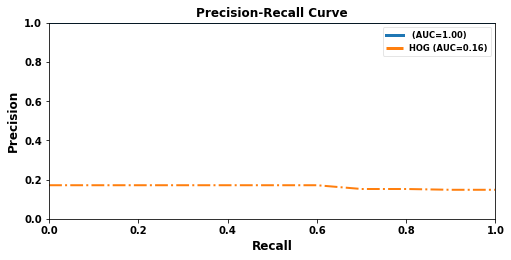

In [37]:
#datapath = 'D:\\workspace\\data\\dataset\\06\\test'
#datapath = 'D:\\workspace\\data\\spring_summer'
datapath = 'D:\workspace\proj7643\CampusLoopDataset'
plot(alexnet,datapath)

# Dataset

# Other model
##### pretrained ones

# Other methods (other than 'projective tranformation + HOG'?)